<a href="https://colab.research.google.com/github/HugoMI/Proyectos-Facultad-de-Ciencias/blob/main/ProyectoEcdeCalor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1><center><font color=#800000>**Proyecto Final de Análisis Numérico**</font></center></h1>
#<h2><center>**Comparación esquema implícito y explícito en la resolución de la ecuación de difusión de calor**</center></h2>
<h3><center>Martínez Ibarra Hugo (310199694)</center></h3>
<h3><center>Semestre 2021-1</center></h3>

## **Resumen**

<p align="justify">El trabajo consiste principalmente en implementar dos tipos de resolución de una ecuación diferencial parcial (EDP), a saber la ecuación de difusión de calor; esquema implícito y explícito. Se programará un método un numérico por cada esquema para resolver la ecuación diferencial parcial. Con el fin de comparar ambos procedimientos de resolución bajo ciertos criterios de precisión y factibilidad. </p>



## **Objetivos**

<p align="justify">Mostrar, en principio, la efectividad de las herramintas computacionales y de programación para aproximar la solución de una ecuación diferencial parcial parabólica; la ecuación de difusión de calor. Más aún, dar solución al problema a través de los dos tipos de esquema: implícito y explítico. Comparar ambos desarrollos y de ser posible concluir las ventajas y desventajas que conlleva cada uno.</p>

## **Marco teórico**

### **Ecuación de difusión de calor**
<p align="justify">La ecuacuón de difusión o ecuación de calor es una ecuación diferencial parcial de segundo orden, del tipo parabólico.</p>

$$u_{t} - K \Delta u = f \tag1$$

$$\frac{\partial u(x,t)}{\partial t} - K \sum_{i=1}^{n} \frac{\partial u(x,t)}{\partial x^{2}} = f(x,t)$$

<DIV align="justify">

donde $u(x,t)$ con $t>0$ la variable temporal y $x \in U$ la variable espacial, $U$ un abierto de $\mathbb{R}^{n}$. $K$ es conocida como la constante de difusión. La variable incognita es $u: \bar{U}\times [0,\infty) \rightarrow \mathbb{R}$. La función $f:U\times [0,\infty) \rightarrow \mathbb{R}$ es dada. Cuando $f \equiv 0$ se tiene la ecuación de calor homogénea.

Un ejemplo común de difusión está dado por la conducción de calor en un cuerpo sólido. La conducción viene de colisiones moleculares, tranferencia de calor por energía cinpetica, sin movimiento macroscópico del material.

Si el medio es homogéneno (su) e isotrópico con respecto a la propagación de calor, al evolución de la temperatura es descrita por la ecuación $(1)$, donde $f$ representa la intensidad de una fuente distribuida externa. Por esta razón se conoce como ecuación de calor.

Por otra aprte, la misma ecuación constituye un modelo mucho más general de difusión, donde por difusión, se refiere por ejemplo al transporte de una sustancia debido al movimiento molecular del medio circundante. En este caso, $u$ podría representar la evolución ene el tiempo de la densidad de concentración de un material contaminante o de un soluto en un líquido o un gas (tinte en un líquido, humo en la atmósfera) o incluso una densidad de probabilidad. Podemos decir que la ecuación de difusión unifica a escala macroscópica una variedad de fenómenos, que se ven bastante diferentes cuando se observan a escala microscópica.

En el caso presente se modelará la conducción de calor a lo largo de una barra de longitud definida $L$, en un tiempo finito $T$, sin la presencia de una fuente externa; es decir, una ecuación de calor homgénea.
</DIV>

<center>
<img class="center" src="https://github.com/HugoMI/Proyectos-Facultad-de-Ciencias/blob/main/ImagenesProyecto/rodheateq.png?raw=1" width="400" >
</center>

### **Problema de Cauchy homogéneo en $\mathbb{R}$**
<p align="justify">Consiste en resolver una ecuación diferencial sujeta a unas ciertas condiciones de frontera o valores iniciales sobre la solución cuando una de las variables que la definen, toma un determinado valor (usualmente, t=0, para modelar las condiciones del sistema en el instante inicial). Un problema de Cauchy puede ser un problema de valor inicial o un problema de condición de frontera. Su nombre se debe a Augustin Louis Cauchy.

El problema de Cauchy para la ecuación de calor homogénea en una dimensión $x \in U \subset \mathbb{R}$; es decir con condiciones iniciales es</p>

$$\frac{\partial u}{\partial t}(x,t) - K \frac{\partial u}{\partial x^{2}}(x,t) = 0 \qquad 0\leq x \leq L, 0 \leq t \leq T$$
$$u(0,t) = u_{0} \in \mathbb{R} \qquad t\geq 0$$
$$u(L,t) = u_{L} \in \mathbb{R} \qquad t\geq 0$$
$$u(x,0) = g(x) \qquad x \in [0,L]$$

<p align="justify">En este caso, debido a que el procedimiento del problema será numérico, habrá que discreticar tanto la dimension espacio como temporal; es decir, la solución $u$ estará determinada para una serie de puntos $x_{i} \in [0,L]$ con $i \in \{0,1,...,N_{x}\}$ y $t_{j} \in [0,T]$ con $i \in \{0,1,...,N_{t}\}$. Esto se desarrollará con detalle más adelante.</p>

### **Esquema explícito**
<DIV align="justify">

Este tipo de esquema para resolver numericamente una ecuación diferencial parcial consiste en obtener los valores aproximados de $u(x_{i},t_{j+1})$ a aprtir de valores anterioes; es decir, la solución al tiempo $t_{j+1}$ sólo depende de la solución al tiempo $t_{j}$.

El esquema explícito involucra el cálculo del estado del sistema en un tiempo posterior al estado del sistema actual sin mucha necesidad de resolver varias ecuaciones algebraicas, lo cual permite una fácil implementación del método numérico a programar.

El método explícito que se tratará aquí es el método FTCS por las siglas en inglés de *Forward Time Centered Space* (hacia adelante en el tiempo y centrado en el espacio). Es un método de diferencias finitas que se utiliza para resolver numéricamente la ecuación de calor y ecuaciones diferenciales parciales parabólicas similares. Es un método de primer orden en el tiempo, explícito en el tiempo y es condicionalmente estable.
</DIV>

<center>
<img class="center" src="https://github.com/HugoMI/Proyectos-Facultad-de-Ciencias/blob/main/ImagenesProyecto/f1.jpg?raw=1" width="400" >
</center>

### **Esquema implícito**
<DIV align="justify">

Este tipo de esquema para resolver numericamente una ecuación diferencial parcial consiste aproximar la solución al resolver una ecuación que involucra el estado actual del sistema y el anterior; observar que esto es equivalente a resolver el sistema para el tiempo siguiente $t_{j+1}$ con información disponible de ese momento y el tiempo actual $t_{j}$. De ahí el nombre, pues la solución $u(x_{i},t_{j})$ queda expresada de forma implícita.

Como el esquema implícito involucra información de dos estados en tiempos distintos consecutivos, esto lleva en muchos casos (como se verá más adelante) a generar un sistema de ecuaciones a resolver, donde con información de un tiempo anterior se busca la aproximación de la solución al tiempo siguiente.

El método explícito que se tratará aquí es el método de *Crank-Nicolson* debido a sus creadore John Crank (1916-2006) y Phyllis Nicolson (1917-1968). es un método de diferencias finitas que se utiliza para resolver numéricamente la ecuación de calor y ecuaciones diferenciales parciales similares. Es un método de segundo orden en el tiempo. Está implícito en el tiempo y es numéricamente estable, de hecho es incondicionalmente estable.
</DIV>

<center>
<img class="center" src="https://github.com/HugoMI/Proyectos-Facultad-de-Ciencias/blob/main/ImagenesProyecto/f2.jpg?raw=1" width="400" >
</center>

## **Desarrollo**

### **Planteamiento del problema**

Al considerar la forma del problema de Cauchy, el problema a resolver en específico es con los siguientes datos $K=1.44$, $L=1.0$, $T=0.6$, $u_{0}=2.0$, $u_{L}=0.5$ y $g(x)=2-1.5x + sin(\pi x)$; es decir

$$\frac{\partial u}{\partial t}(x,t) - 1.44 \frac{\partial u}{\partial x^{2}}(x,t) u = 0 \qquad 0\leq x \leq 1, 0 \leq t \leq T$$
$$u(0,t) = 2.0 \qquad t\geq 0$$
$$u(1,t) = 0.5 \qquad t\geq 0$$
$$u(x,0) = 2-1.5x + sin(\pi x) \qquad x \in [0,1]$$

Como se mencionó antes, será necesario discretizar la dimensión de espacio y tiempo para poder implementar métodos numéricos de solución por diferencias finitas.

### **Método FTCS (explícito)**
<DIV align="justify">

Para comenzar se selecciona un entero $N_{x}$ para definir el tamaño de incremento en el eje $x$ como
$$\Delta x= \frac{L}{N_{x}}$$
Enseguida se elige un tamaño de incremento $\Delta t$ para el tiempo $t$ y $N_{t}$ el número de pasos en el tiempo. Así los puntos de la malla, para la solución $u$ queda determinada como $(x_{i},t_{j})$ donde $x_{i} = i \Delta x$ para $i \in \{0,1,...,N_{x}\}$ y $t_{j} = j \Delta t$ con $j \in \{0,1,...,N_{t}\}$.

De ahora en adelante se denotara $u_{i}^{j}:= u(x_{i},t_{j})$ por facilidad de notación.

Al aproximar la derivada respecto al tiempo mediante diferencias finitas hacia adelante y aproximar la segunda derivada respecto al espacio con diferencias finitas centradas se obtiene

$$\frac{u_{i}^{j+1}-u_{i}^{j}}{\Delta t} -K \frac{u_{i+1}^{j} -2 u_{i}^{j} + u_{i-1}^{j}}{(\Delta x)^{2}}=0 \tag a$$

Se denotará ademas $D:=\frac{K \Delta t}{2(\Delta x)^{2}}$, que representa una constante adimensional. Así, la expresión anterior se simplifica como

$$u_{i}^{j+1} = u_{i}^{j} + D(u_{i+1}^{j} -2 u_{i}^{j} + u_{i-1}^{j})$$

para $i \in \{1,...,N_{x}-1\}$. Este método es condicionalmente estable, análisis que se puede encontrar con detalle en *Numerical Analysis* de Richard Burden y Douglas Faires. Esta condición expresa que el algoritmo es numericamente estable siempre que

$$\frac{K \Delta t}{(\Delta x)^{2}} = D \leq 0.5 \tag b$$

Como ejemplo, para entender el funcionamiento de este método, se mostrará para $N_{x}=4$

Cuando $t=0$ se tiene
$$u_{0}^{0} = g(x_{0}), \quad u_{1}^{0} = g(x_{1}), \quad... \quad, \quad u_{4}^{0} = g(x_{4})$$

$$u_{0}^{j}=u_{0} \qquad \forall j\geq 1$$

Con $i=1$
$$u_{1}^{j+1} = u_{1}^{j} + D(u_{2}^{j} -2 u_{1}^{j} + u_{0}^{j})$$
Con $i=2$
$$u_{2}^{j+1} = u_{1}^{j} + D(u_{3}^{j} -2 u_{2}^{j} + u_{1}^{j})$$
Con $i=3$
$$u_{3}^{j+1} = u_{1}^{j} + D(u_{4}^{j} -2 u_{3}^{j} + u_{2}^{j})$$

$$u_{4}^{j}=u_{L} \qquad \forall j\geq 1$$

Cabe mencionar un detalle sutil, pero importante usualmente la función $g$ permite que suceda: $u_{0}^{0} = g(x_{0}) = u_{0}$ y $u_{4}^{0} = g(x_{4}) = u_{L}$.

Cuando el algoritmo comienza con $t=0$; es decir, cuando $j=0$, los términos a la derecha de las ecuaciones resultantantes son todos conocidos. Entonces los valores de la izquierda quedan directametne determinados, y ahora los valores de $u_{i}^{1}$ con $i \in \{0,1,...,4\}$ se usan para calcular los de $u_{i}^{2}$ y así sucesivamente hasta $j=N_{t}-1$.
</DIV>

### **Método Crank-Nicolson (implícito)**
<DIV align="justify">

Para comenzar se selecciona un entero $N_{x}$ para definir el tamaño de incremento en el eje $x$ como
$$\Delta x= \frac{L}{N_{x}}$$
Enseguida se elige un entero $N_{t}$ para definir de manera análoga el tamaño de incremento en el tiempo como
$$\Delta t = \frac{T}{N_{t}}$$
Así los puntos de la malla, para la solución $u$ queda determinada como $(x_{i},t_{j})$ donde $x_{i} = i \Delta x$ para $i \in \{0,1,...,N_{x}\}$ y $t_{j} = j \Delta t$ con $j \in \{0,1,...,N_{t}\}$.

Recordar que $u_{i}^{j}:= u(x_{i},t_{j})$.

Al aproximar la derivada respecto al tiempo mediante diferencias finitas hacia adelante y aproximar la segunda derivada respecto al espacio con diferencias finitas centradas en $(x_{i}, t_{j+\frac{1}{2}})$ se obtiene

$$\frac{u_{i}^{j+1}-u_{i}^{j}}{\Delta t} -K \frac{u_{i+1}^{j+\frac{1}{2}} -2 u_{i}^{j+\frac{1}{2}} + u_{i-1}^{j+\frac{1}{2}}}{(\Delta x)^{2}}=0 \tag c$$

Después, si se consideran las diferencias ponderadas como

$$u_{i}^{j+\frac{1}{2}} \approx \frac{1}{2} \left(u_{i}^{j+1}+u_{i}^{j}\right)$$

y de manera similar para $u_{i-1}^{j+\frac{1}{2}}$ y $u_{i+1}^{j+\frac{1}{2}}$ al sustituir en $(c)$ se obtiene

$$\frac{u_{i}^{j+1}-u_{i}^{j}}{\Delta t} -K \frac{\frac{1}{2} \left(u_{i+1}^{j+1}+u_{i+1}^{j}\right) -2 \frac{1}{2} \left(u_{i}^{j+1}+u_{i}^{j}\right) + \frac{1}{2} \left(u_{i-1}^{j+1}+u_{i-1}^{j}\right)}{(\Delta x)^{2}}=0$$

$$\implies u_{i}^{j+1}-u_{i}^{j} = \frac{K \Delta t}{2(\Delta x)^{2}} \left[u_{i+1}^{j+1}+u_{i+1}^{j} -2 \left(u_{i}^{j+1}+u_{i}^{j}\right) + u_{i-1}^{j+1}+u_{i-1}^{j} \right]$$

Si se denota nuevamente $D:= \frac{K \Delta t}{(\Delta x)^{2}}$ y se multiplica ambos lados de laigualdad por $2$ se tiene que

$$2 u_{i}^{j+1} - 2 u_{i}^{j} = D \left[u_{i+1}^{j+1}+u_{i+1}^{j} -2 \left(u_{i}^{j+1}+u_{i}^{j}\right) + u_{i-1}^{j+1}+u_{i-1}^{j} \right]$$

Finalmente al simplificar se obtiene

$$-D u_{i-1}^{j+1} + 2(1+D) u_{i}^{j+1} - D u_{i+1}^{j+1} = D u_{i-1}^{j} + 2(1-D) u_{i}^{j} + D u_{i+1}^{j}$$

para $i \in \{1,...,N_{x}-1\}$. A simple vista se puede observar que del lado derecho de la igualdad se encuentra la solución al tiempo $t_{j}$ mientras que del lado derecho está la solución al tiempo $t_{j+1}$. Sin embargo, la solución $u_{i}^{j+1}$ está implícita en la expresión al depender de posiciones aledañas. Este método es incondicionalmente estable, análisis que se puede encontrar en *Numerical Mathematics and Computing* de Ward Cheney y David Kincaid.

Como ejemplo, para entender el funcionamiento de este método, se mostrará para $N_{x}=5$

Cuando $t=0$ se tiene
$$u_{0}^{0} = g(x_{0}), \quad u_{1}^{0} = g(x_{1}), \quad... \quad, \quad u_{4}^{0} = g(x_{4})$$

$$u_{0}^{j}=u_{0} \qquad \forall j\geq 1$$

Con $i=1$
$$-D u_{0}^{j+1} + 2(1+D) u_{1}^{j+1} - D u_{2}^{j+1} = D u_{0}^{j} + 2(1-D) u_{1}^{j} + D u_{2}^{j}$$

Como $u_{0}^{j} = u_{0}^{j+1}$, y más aún $u_{0}^{j}=u_{0}$ entonces lo anterior se reduce a

$$2(1+D) u_{1}^{j+1} - D u_{2}^{j+1} = 2(1-D) u_{1}^{j} + D u_{2}^{j} + 2 D u_{0}$$

Con $i=2$
$$-D u_{1}^{j+1} + 2(1+D) u_{2}^{j+1} - D u_{3}^{j+1} = D u_{1}^{j} + 2(1-D) u_{2}^{j} + D u_{3}^{j}$$

Con $i=3$
$$-D u_{2}^{j+1} + 2(1+D) u_{3}^{j+1} - D u_{4}^{j+1} = D u_{2}^{j} + 2(1-D) u_{3}^{j} + D u_{4}^{j}$$

Con $i=4$
$$-D u_{3}^{j+1} + 2(1+D) u_{4}^{j+1} - D u_{5}^{j+1} = D u_{3}^{j} + 2(1-D) u_{4}^{j} + D u_{5}^{j}$$

Como $u_{5}^{j} = u_{5}^{j+1}$, y más aún $u_{5}^{j}=u_{L}$ entonces lo anterior se reduce a

$$- D u_{3}^{j+1} + 2(1+D)u_{4}^{j+1}  = D u_{3}^{j} + 2(1-D) u_{4}^{j} + 2 D u_{L}$$
Al poner el sistema de ecuaciones en forma matricial se obtiene

$$\begin{bmatrix}
2(1+D) & -D & 0 & 0 \\
-D & 2(1+D) & -D & 0 \\
0 & -D & 2(1+D) & -D \\
0 & 0 & -D & 2(1+D)
\end{bmatrix} \begin{bmatrix}
u_{1}^{j+1} \\
u_{2}^{j+1} \\
u_{3}^{j+1} \\
u_{4}^{j+1} 
\end{bmatrix} = \begin{bmatrix}
2(1-D) & D & 0 & 0 \\
D & 2(1-D) & D & 0 \\
0 & D & 2(1-D) & D \\
0 & 0 & D & 2(1-D)
\end{bmatrix} \begin{bmatrix}
u_{1}^{j} \\
u_{2}^{j} \\
u_{3}^{j} \\
u_{4}^{j} \\
\end{bmatrix} + \begin{bmatrix}
2D u_{0} \\
0 \\
0 \\
2D u_{L}
\end{bmatrix}$$

Observar adeEn forma reducida se puede escribir como

$$A \boldsymbol{\tilde{u}_{i}^{j+1}} = B \boldsymbol{\tilde{u}_{i}^{j}} + b$$

Donde

$$A = \begin{bmatrix}
2(1+D) & -D & 0 & 0 \\
-D & 2(1+D) & -D & 0 \\
0 & -D & 2(1+D) & -D \\
0 & 0 & -D & 2(1+D)
\end{bmatrix}$$

$$B = \begin{bmatrix}
2(1-D) & D & 0 & 0 \\
D & 2(1-D) & D & 0 \\
0 & D & 2(1-D) & D \\
0 & 0 & D & 2(1-D)
\end{bmatrix}$$

$$\boldsymbol{\tilde{u}_{i}^{j+1}} = \begin{bmatrix}
u_{1}^{j+1} \\
u_{2}^{j+1} \\
u_{3}^{j+1} \\
u_{4}^{j+1} 
\end{bmatrix} \qquad \boldsymbol{\tilde{u}_{i}^{j}} = \begin{bmatrix}
u_{1}^{j} \\
u_{2}^{j} \\
u_{3}^{j} \\
u_{4}^{j} \\
\end{bmatrix} \qquad b = \begin{bmatrix}
2D u_{0} \\
0 \\
0 \\
2D u_{L}
\end{bmatrix}$$

Cuando el algoritmo comienza con $t=0$; es decir, cuando $j=0$, los términos a la derecha de las ecuaciones resultantantes, $B \boldsymbol{u_{i}^{0}} + b =: c_{0}$, son todos conocidos. Así, se tiene el siguientes sistema de ecuaciones

$$A \boldsymbol{\tilde{u}_{i}^{0+1}} = c_{0}$$

el cual se resuelve con alguno de los métodos vistos, como descomposición LU o directamente con alguna de las funciones para resolver sistemas de ecuaciones lienales de alguna biblioteca de Pyhton u otro lenguaje.

Así, se obtiene la aproximación de la solución al tiempo siguiente; es decir, $\boldsymbol{\tilde{u}_{i}^{1}}$, después con esta matriz (o vector columna) se vuelve ha realizar la operación $B \boldsymbol{u_{i}^{1}} + b =: c_{1}$. Por tanto se genera el sistema de ecuaciones $A \boldsymbol{\tilde{u}_{i}^{2}} = c_{1}$, y así sucesivamente  hasta $j= N_{t}-1$.


</DIV>

## **Resultados**


### **Metodología de comparación**
<DIV align="justify">

1. La primera comparación consiste en el tiempo de ejecución de ambos algoritmos con la misma cantidad de pasos $N_{x}$ y $N_{t}$, así como el mismo incremento en el tiempo $\Delta t$ y por tanto el tiempo final $T$.

2. La segunda comparación consiste en el tiempo de ejecución dado el mismo tiempo final $T$ y número de pasos $N_{x}$, pero diferente tamaño de incremento en el tiempo $\Delta t$ para el caso del método FTCS y diferente numero de pasos $N_{t}$ para el método Crank-Nicolson.

3. La última comparación es especificamente para el método de Crank Nicholson al cambiar el método para resolver los sistemas de ecuaciones, se verá si mejora su tiempo de ejecución al usar el método de descomposición LU con sustitución hacia adelante y ahcia atrás, en lugar del método de álgebra lineal de Numpy (np.linalg.solve()).

</DIV>

### **Comparación 1**

#### Método FTCS (explícito)


El valor de D es 0.0864
Tiempo de ejecución: 2.5962209701538086 segundos


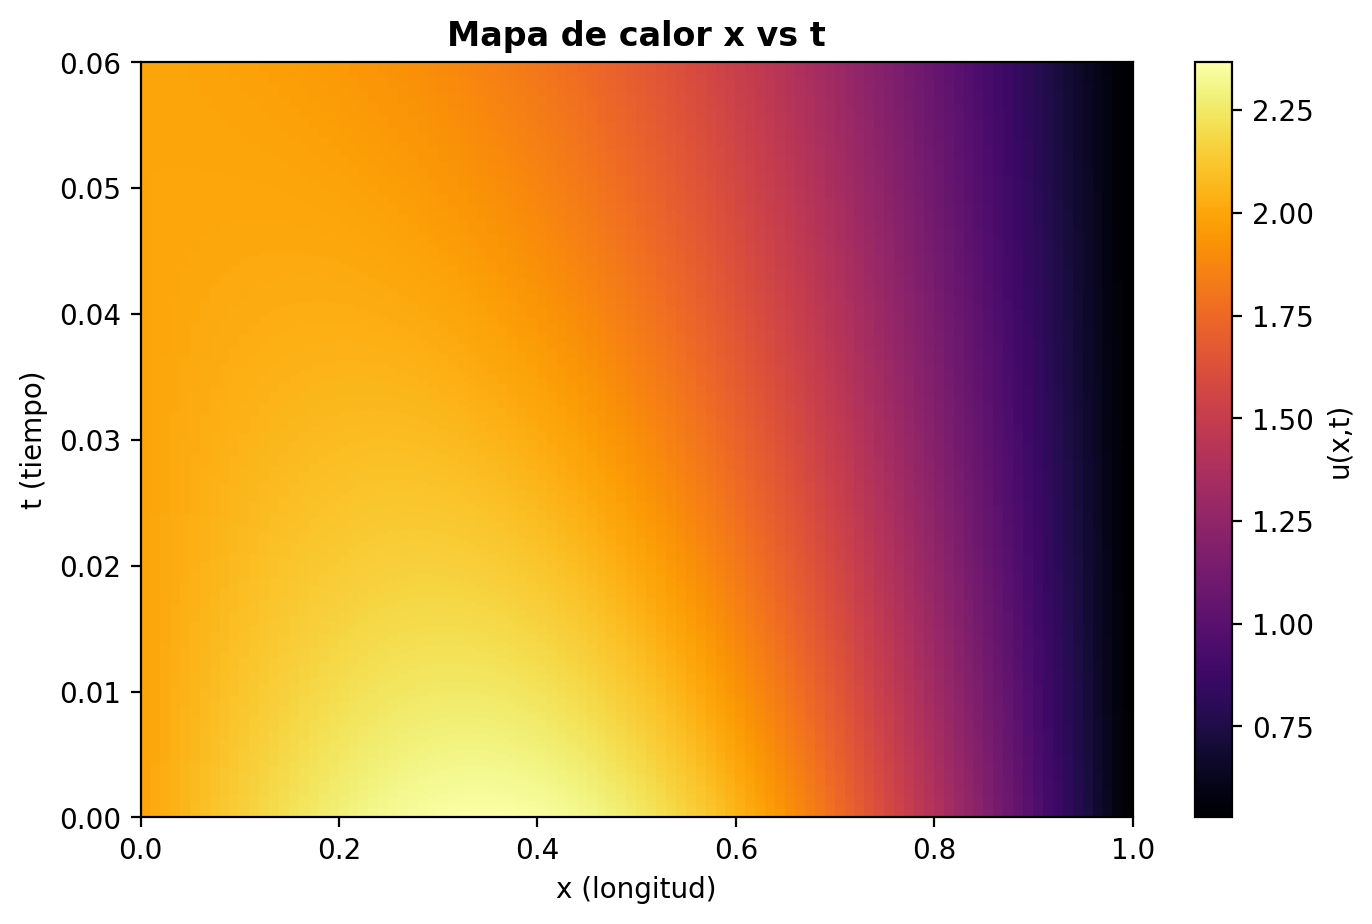

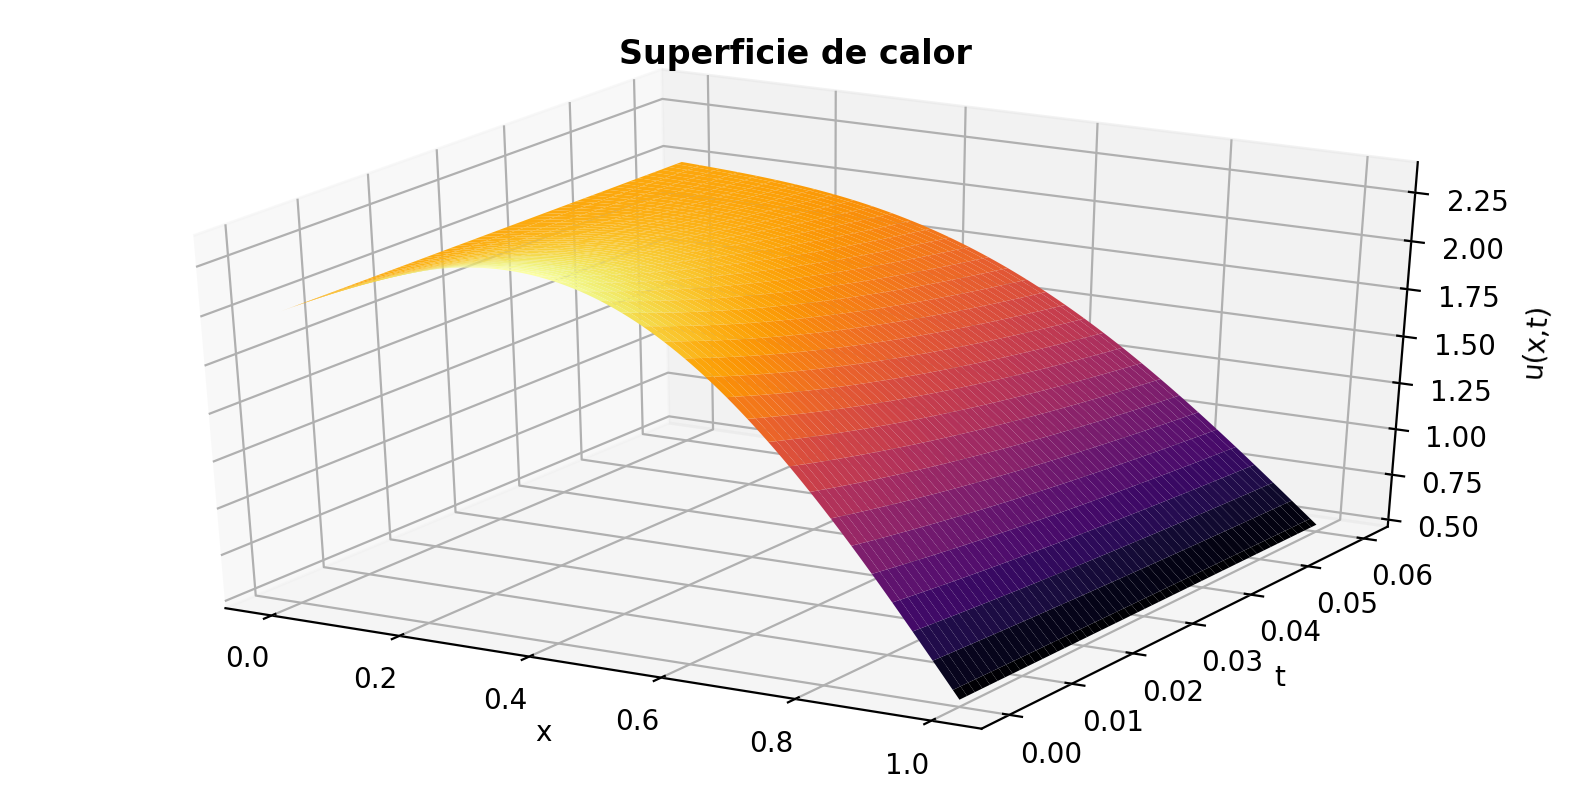

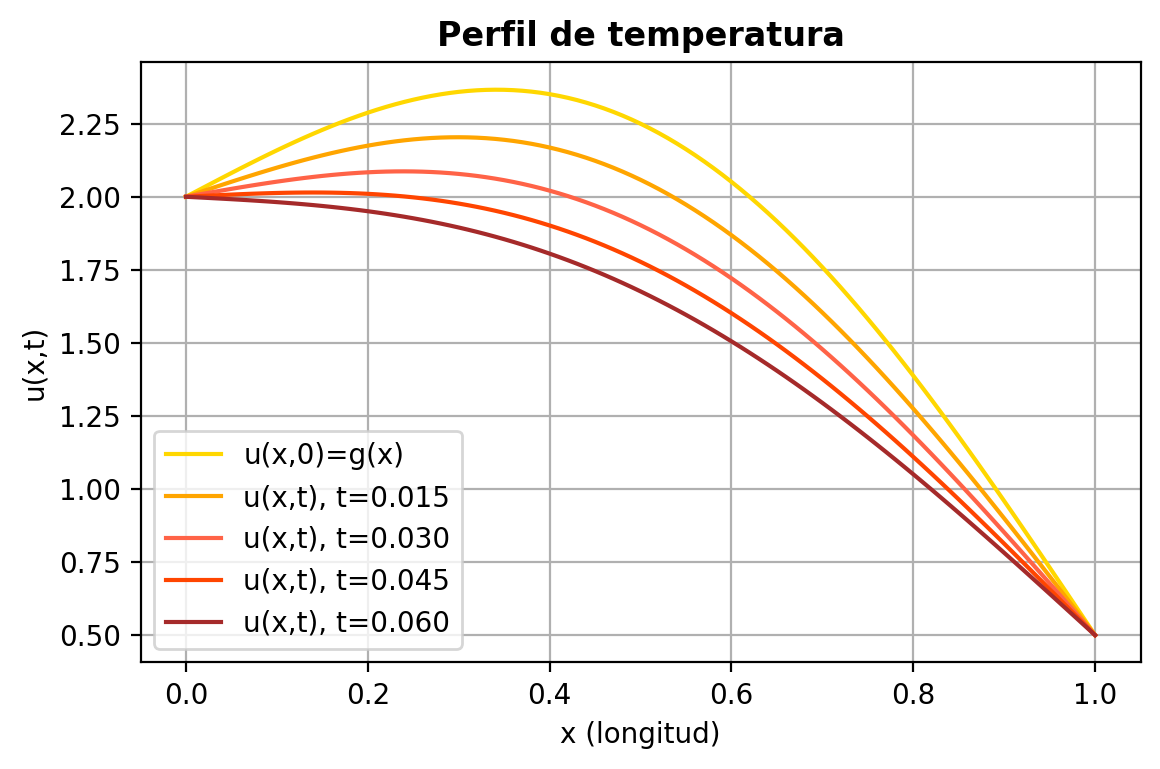

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Se define la función de condición de frontera; u(x,0)=g0(x)
def g(x):
    return (2-1.5*x+np.sin(np.pi*x))


# La constante de difusión
K = 1.44

# Condiciones de frontera
# u(0,t)
u0t = 2.0
# u(L,t)
uLt = 0.5

# Número de pasos en el espacio
Nx = 100
# Numero de pasos en el tiempo
Nt = 10000
# Valor máximo de longitud
xmax = 1.0
# Magnitud de incremento en el tiempo
dt = 6e-6

def FTCS(K, g, u0t, uLt, Nx, Nt, xmax, dt):
    # Para iniciar el contador de tiempo de ejecución
    start_timeFTCS = time.time()
    # Magnitud de incremento en el espacio
    dx = xmax/Nx
    # Constante adimensional
    D = K*dt/(dx*dx)
    
    # Se discretiza el espacio
    x = np.linspace(0.0, xmax, Nx+1)
    # Se discretiza el tiempo
    t = np.array([j*dt for j in range(Nt+1)])
    
    # Se genera matriz para almacenar aproximaciones de la solución u
    u = np.zeros((Nt+1, Nx+1))
    
    # Se verifica la condición de estabilidad
    if D > 0.5:
        print('Algoritmo inestable, no procede el cálculo, pues D= ' + str(D))
        
    else:
        # Se almacenan los valores de la solución con la condición de frontera: u(x,0)=f0(x)
        # Notar que por reglón se alamcenarán los valores u a cierto tiempo
        for i in range(Nx+1):
            u[0][i] = g(x[i])
        # Ahora se calcula la aproximación de la solución u, con la expresión numérica de diferencias finitas hacia adelante
        for j in range(Nt):
            u[j+1][0] = u0t
            for i in range(1, Nx):
                u[j+1][i] = u[j][i] + D*(u[j][i+1] - 2*u[j][i] + u[j][i-1])
            u[j+1][Nx] = uLt
    
        # El valor de D
        print('El valor de D es', D)
        # Se visualiza el tiempo de ejecución del algoritmo
        print("Tiempo de ejecución: %s segundos" % (time.time() - start_timeFTCS))
        
        # Se establece la malla para graficar el mapa de calor
        xaxis, yaxis = np.meshgrid(x, t)
        
        # Se cofiguran las especificaciones del gráfico de mapa de calor, como medida, tipo de gráfico y etiquetas
        fig1 = plt.figure(figsize=(8,5),dpi=200)
        plt.pcolormesh(xaxis, yaxis, u, cmap='inferno', shading='nearest')
        plt.colorbar(label='u(x,t)') #need a colorbar to show the intensity scale
        plt.xlabel('x (longitud)')
        plt.ylabel('t (tiempo)')
        plt.title('Mapa de calor x vs t',fontweight='bold')
        plt.show()
        
        # Se cofiguran las especificaciones del gráfico de superficie, como medida, tipo de gráfico y etiquetas
        fig2 = plt.figure(figsize=(10,5),dpi=200)
        ax2 = plt.axes(projection='3d')
        ax2.plot_surface(xaxis, yaxis, u, cmap='inferno', edgecolor='none')
        ax2.set_xlabel('x')
        ax2.set_ylabel('t')
        ax2.set_zlabel('u(x,t)')
        plt.title('Superficie de calor',fontweight='bold')
        
        # Se cofiguran las especificaciones del gráfico de x vs u
        fig3 = plt.figure(figsize=(5,3),dpi=200)
        # Se establece espacio (con parámetros predeterminados) donde estarán los distintos gráficos
        ax3 = fig3.add_axes([0,0,1,1])
        # Especificaciones de datos y etiquetas
        # Se toman algunos índices para ver la evolución de la solución en el tiempo
        # Separador de índices
        sep = int(Nt/4)
        index0, index1, index2, index3, index4 = 0, sep, 2*sep, 3*sep, 4*sep
        # Se calcula el tiempo correspondiente a esos índices
        tim0, tim1, tim2, tim3, tim4 = index0*dt, index1*dt, index2*dt, index3*dt, index4*dt
        # Se generan los gráficos
        ax3.plot(x, u[index0,:], label='u(x,0)=g(x)', color='gold')
        ax3.plot(x, u[index1,:], label='u(x,t), t={0:.3f}'.format(tim1), color='orange')
        ax3.plot(x, u[index2,:], label='u(x,t), t={0:.3f}'.format(tim2), color='tomato')
        ax3.plot(x, u[index3,:], label='u(x,t), t={0:.3f}'.format(tim3), color='orangered')
        ax3.plot(x, u[index4,:], label='u(x,t), t={0:.3f}'.format(tim4), color='brown')
        
        plt.xlabel('x (longitud)')
        plt.ylabel('u(x,t)')
        plt.title('Perfil de temperatura',fontweight='bold')
        plt.grid()
        ax3.legend()
        plt.show

# Se ejecuta el algoritmo FTCS con los valores dados
FTCS(K, g, u0t, uLt, Nx, Nt, xmax, dt)

#### **Método Crank-Nicolson** (implícito)

El valor de D es 0.0864
Tiempo de ejecución: 12.728374719619751 segundos


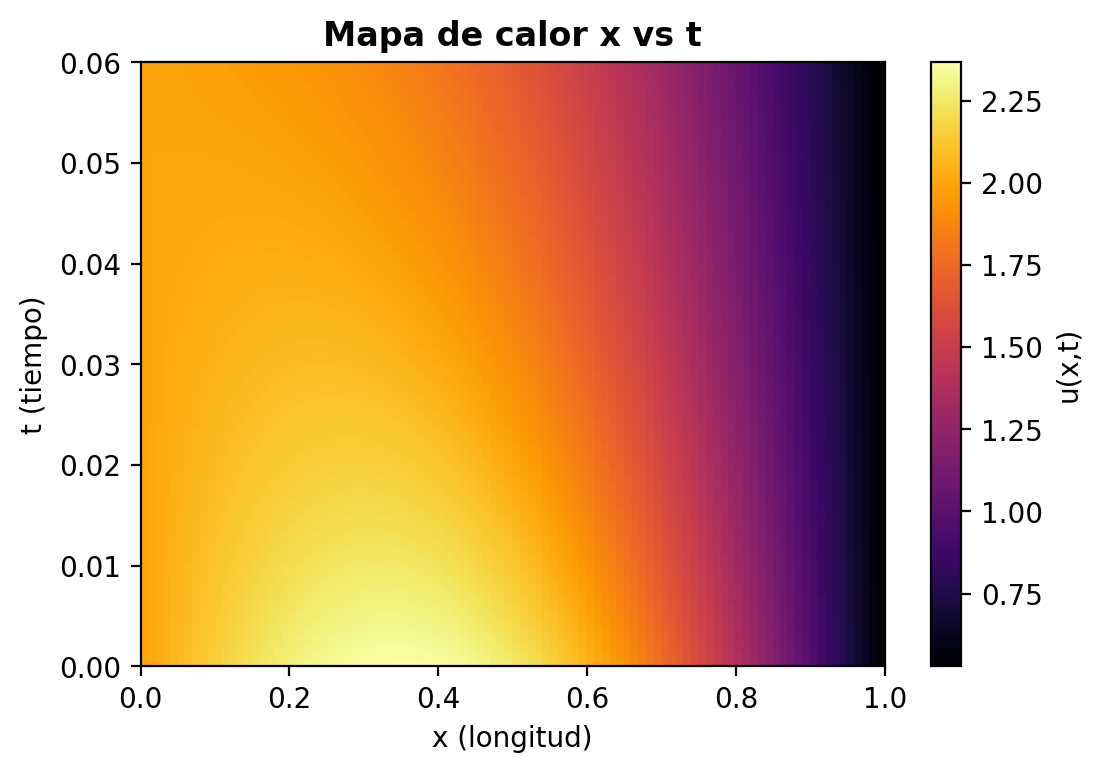

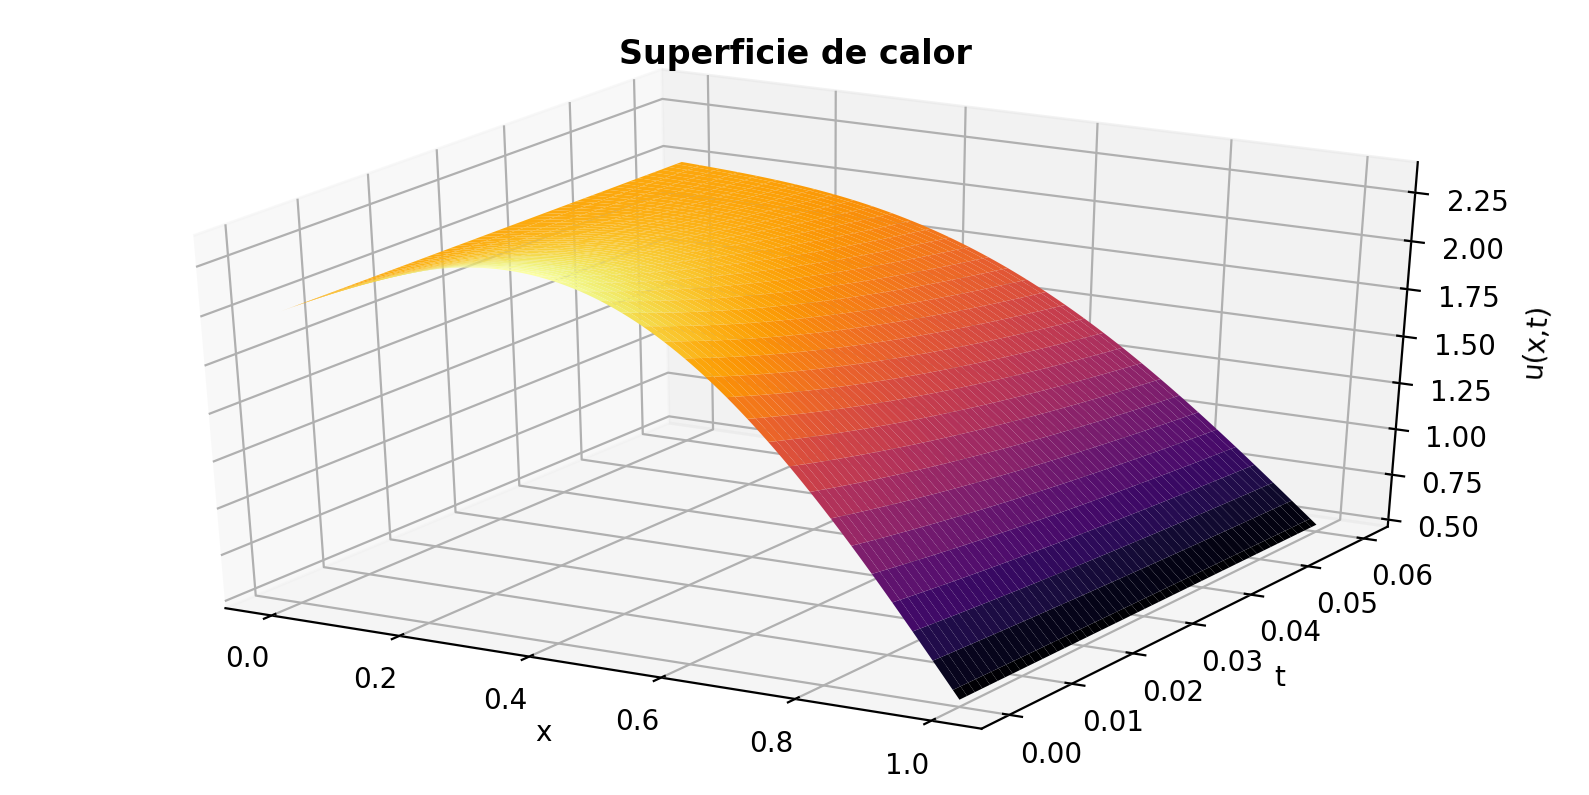

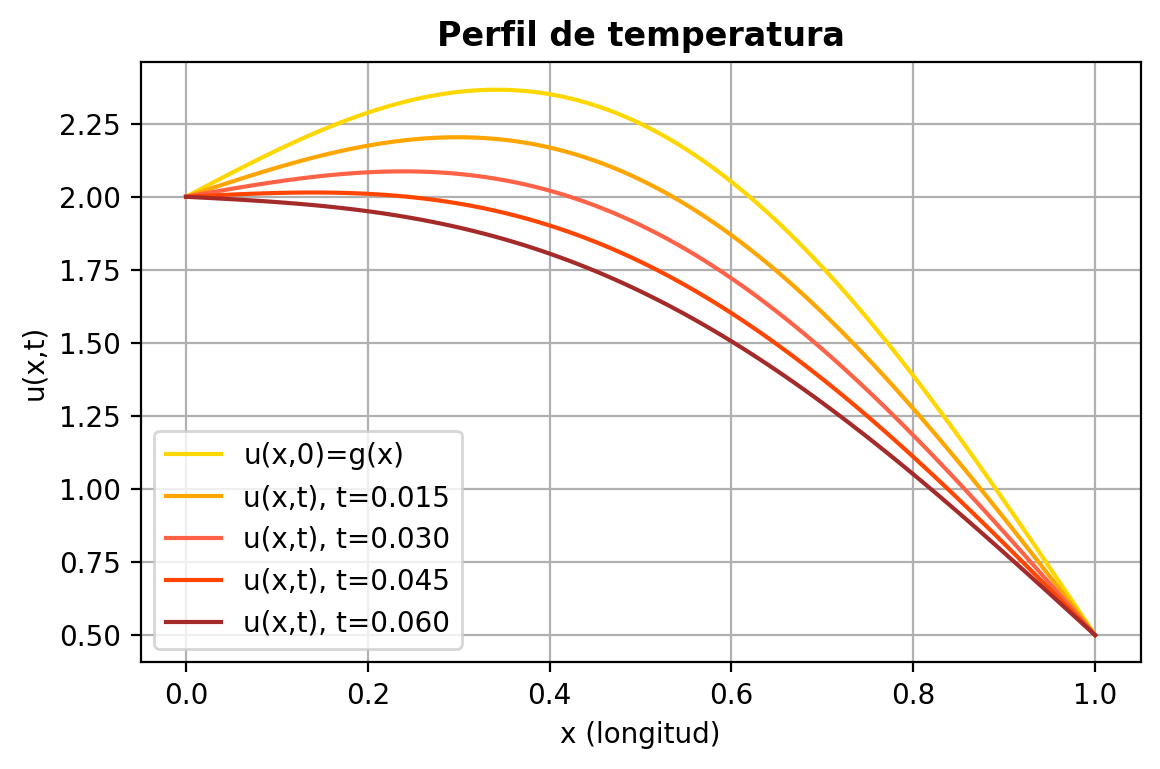

In [ ]:
# Método Crank Nicholson

# Condiciones de frontera
# w(0,t)
w0t = 2.0
# w(L,t)
wLt = 0.5

# Número de pasos en el espacio
Nx = 100
# Número de pasos en el tiempo
Nt = 10000
# Valor máximo de longitud
xmax = 1
# Valor máximo de tiempo
tmax = 0.06

def CrankNicolson(K, g, w0t, wLt, Nx, Nt, xmax, tmax):
    start_timeCN = time.time()
    # Magnitud de incremento en el espacio
    difx = xmax/Nx
    # Magnitud de incremento en el tiempo
    dift = tmax/Nt
    # Constante adimensional
    r = K*dift/(difx*difx)
    
    # Se discretiza el espacio
    xp = np.linspace(0.0, xmax, Nx+1)
    # Se discretiza el tiempo
    tp = np.linspace(0.0, tmax, Nt+1)
    
    # Se generan las matrices que almacenarán a las matrices de coeficientes A y B
    # Notar que su dimensión es dos unidades menor que el número de pasos en el espacio
    # pues no están consierando los extremos, porque son valores conocidos por las
    # condiciones de frontera
    A = np.zeros((Nx-1, Nx-1))
    B = np.zeros((Nx-1, Nx-1))
    
    # Se crea el vector que contiene las condiciones de frontera, u(0,t) y u(L,t),en los extremos,
    # las cuales serán iguales para todo tiempo
    b = np.zeros((Nx-1))
    
    # Se registran las correspondientes entradas a cada matriz, A y B,
    # así como al vector b que contiene las condiciones de frontera u(0,t) y u(L,t)
    for i in range(Nx-1):
        if i==0:
            for j in range(Nx-1):
                if j==0:
                    A[i][j] = 2*(1+r)
                    B[i][j] = 2*(1-r)
                elif j==1:
                    A[i][j] = -r
                    B[i][j] = r
            b[i] = 2*r*w0t
        elif i==Nx-2:
            for j in range(Nx-1):
                if j==Nx-2:
                    A[i][j] = 2*(1+r)
                    B[i][j] = 2*(1-r)
                elif j==Nx-3:
                    A[i][j] = -r
                    B[i][j] = r
            b[i] = 2*r*wLt
        else:
            for j in range(Nx-1):
                if j==i-1 or j==i+1:
                    A[i][j] = -r
                    B[i][j] = r
                elif j==i:
                    A[i][j] = 2*(1+r)
                    B[i][j] = 2*(1-r)
    
    # Se crea el arreglo que almacenará, igual que antes, por renglón
    # la aproximación de la solución w para cada tiempo
    w = []
    
    # Se crea un vector que contiene los valores iniciales de la función solución w,
    # los cuales están dados por le perfil de temperautra, concentración al tiempo t=0
    # w(x,0) = g0(x)
    u = np.array(g(xp))
    w.append(u)
    # El arreglo w se convierte en uno tipo arrray para fácil manejo de matrices
    w = np.array(w)
    
    # Al tiempo t=0 todos los términos de la derecha son conocidos, por lo que se
    # procede al cálculo, el cual consisite en multiplicar la matriz B pro el vector
    # u(valores de w a t=0) excepto los extremos y sumar b; los valores de w en los extremos.
    
    c = B.dot(u[1:-1]) + b
    #bb = np.matmul(B,u[1:-1]) + b
    
    # Una vez que se conoce todo el vector la derecha, ahora se tiene un sistema de ecuaciones
    # de la forma A w^(j+1) = bb, el cual se puede resolver sencillamente por algún metodo
    # Esto se hace en un ciclo for, una cantidad Nt de veces, pues en cada paso se va conociendo
    # el vector bb de la derecha que involucra la solución al tiempo j y se resuelve el sistema
    # para encontrar la solución al siguiente tiempo j+1
    for j in range(Nt):
        # Se resuelve el sistema para encontrar la solución al tiempo siguiente j+1
        u[1:-1] = np.linalg.solve(A,c)
        # Se agrega en cada paso los valores aproximados de la solución al arreglo w
        w= np.append(w,[u],axis=0)
        # Se calcula el nuevo vector bb que involucra la solución al tiempo anterior
        c = B.dot(u[1:-1]) + b
    
    # El valor de D
    print('El valor de D es', r)
    # Se visualiza el tiempo de ejecución del algoritmo
    print("Tiempo de ejecución: %s segundos" % (time.time() - start_timeCN))
    
    # Se establece la malla para graficar el mapa de calor
    xax, yax = np.meshgrid(xp, tp)
    
    # Se cofiguran las especificaciones del gráfico de mapa de calor, como medida, tipo de gráfico y etiquetas
    figcn1 = plt.figure(figsize=(6,4),dpi=200)
    plt.pcolormesh(xax, yax, w, cmap='inferno', shading='nearest')
    plt.colorbar(label='u(x,t)') #need a colorbar to show the intensity scale
    plt.xlabel('x (longitud)')
    plt.ylabel('t (tiempo)')
    plt.title('Mapa de calor x vs t',fontweight='bold')
    plt.show()
    
    # Se cofiguran las especificaciones del gráfico de superficie, como medida, tipo de gráfico y etiquetas
    figcn2 = plt.figure(figsize=(10,5),dpi=200)
    axcn2 = plt.axes(projection='3d')
    axcn2.plot_surface(xax, yax, w, cmap='inferno', edgecolor='none')
    axcn2.set_xlabel('x')
    axcn2.set_ylabel('t')
    axcn2.set_zlabel('u(x,t)')
    plt.title('Superficie de calor',fontweight='bold')
    
    # Se cofiguran las especificaciones del gráfico de x vs u
    figcn3 = plt.figure(figsize=(5,3),dpi=200)
    # Se establece espacio (con parámetros predeterminados) donde estarán los distintos gráficos
    axcn3 = figcn3.add_axes([0,0,1,1])
    # Especificaciones de datos y etiquetas
    # Se toman algunos índices para ver la evolución de la solución en el tiempo
    # Separador de índices
    sep = int(Nt/4)
    ind0, ind1, ind2, ind3, ind4 = 0, sep, 2*sep, 3*sep, 4*sep
    # Se calcula el tiempo correspondiente a esos índices
    t0, t1, t2, t3, t4 = ind0*dift, ind1*dift, ind2*dift, ind3*dift, ind4*dift
    # Se generan los gráficos
    axcn3.plot(xp, w[ind0,:], label='u(x,0)=g(x)', color='gold')
    axcn3.plot(xp, w[ind1,:], label='u(x,t), t={0:.3f}'.format(t1), color='orange')
    axcn3.plot(xp, w[ind2,:], label='u(x,t), t={0:.3f}'.format(t2), color='tomato')
    axcn3.plot(xp, w[ind3,:], label='u(x,t), t={0:.3f}'.format(t3), color='orangered')
    axcn3.plot(xp, w[ind4,:], label='u(x,t), t={0:.3f}'.format(t4), color='brown')
    
    plt.xlabel('x (longitud)')
    plt.ylabel('u(x,t)')
    plt.title('Perfil de temperatura',fontweight='bold')
    plt.grid()
    axcn3.legend()
    plt.show

# Se ejecuta el algoritmo de Crank-Nicolson con los valores dados
CrankNicolson(K, g, w0t, wLt, Nx, Nt, xmax, tmax)

### **Comparación 2**

#### **Método FCTS (explícito)**

El valor de D es 0.432
Tiempo de ejecución: 2.6360790729522705 segundos


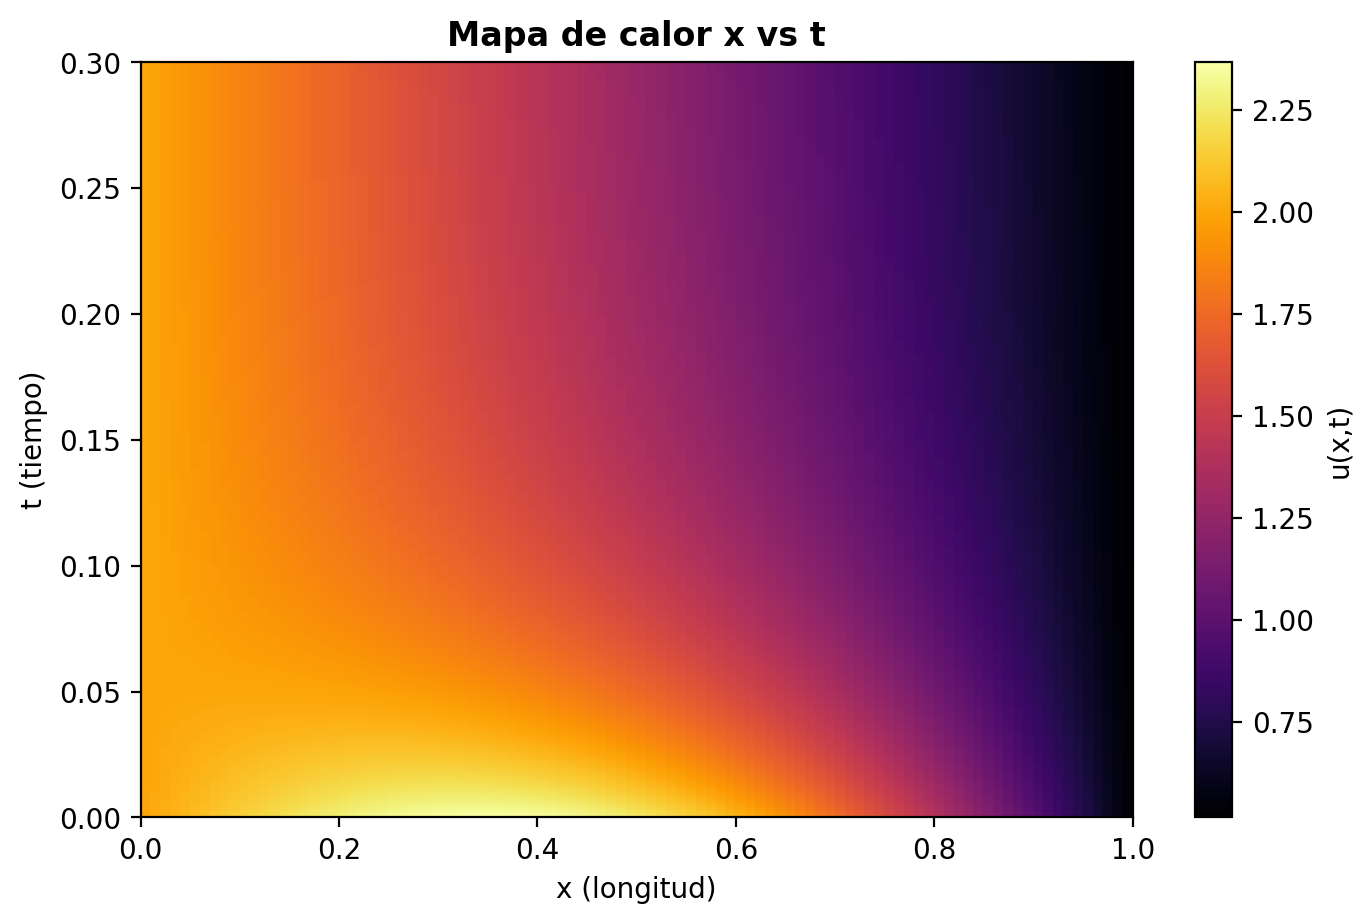

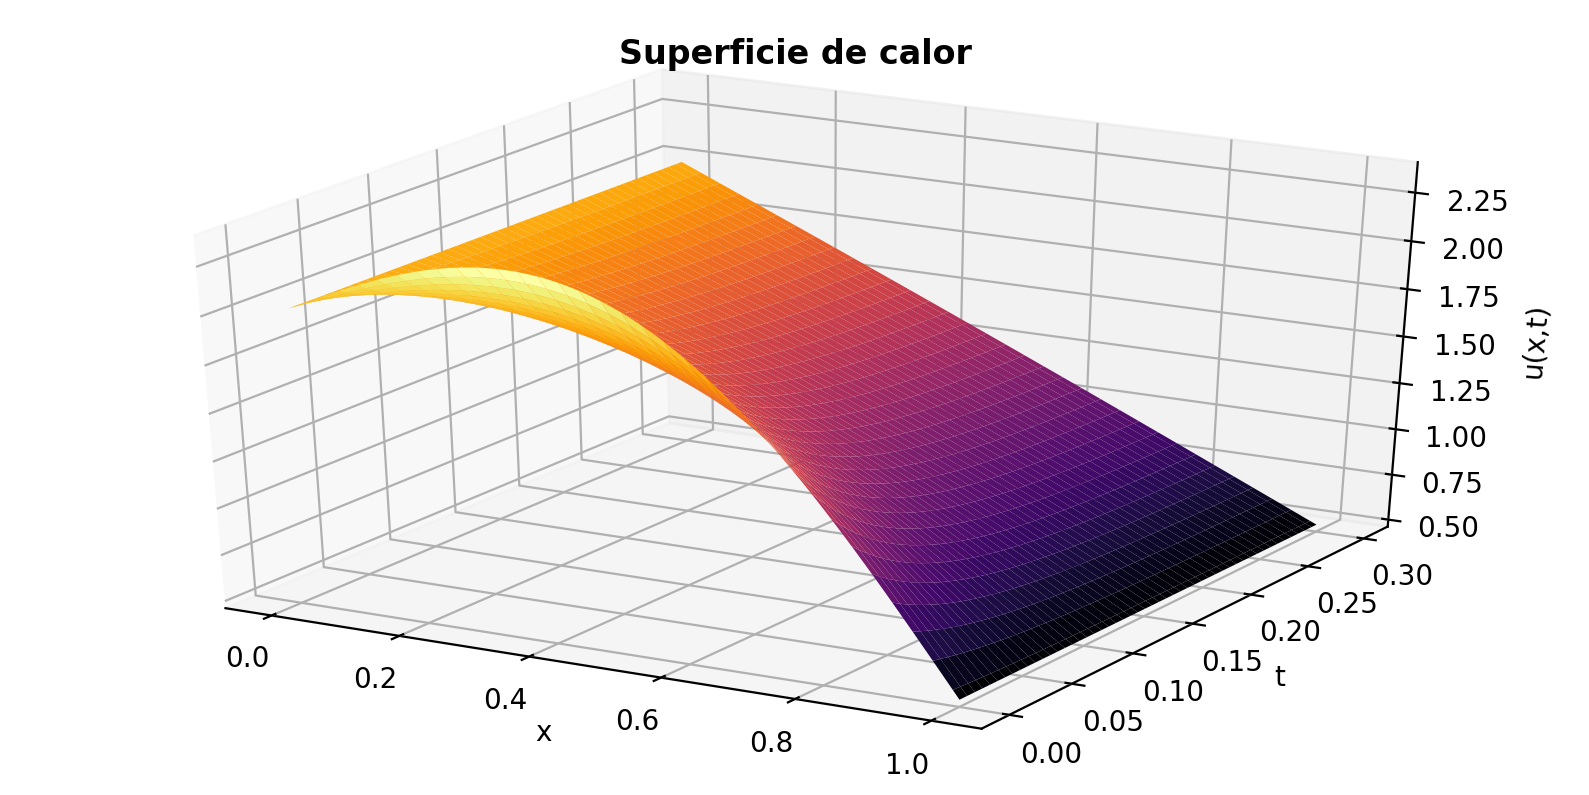

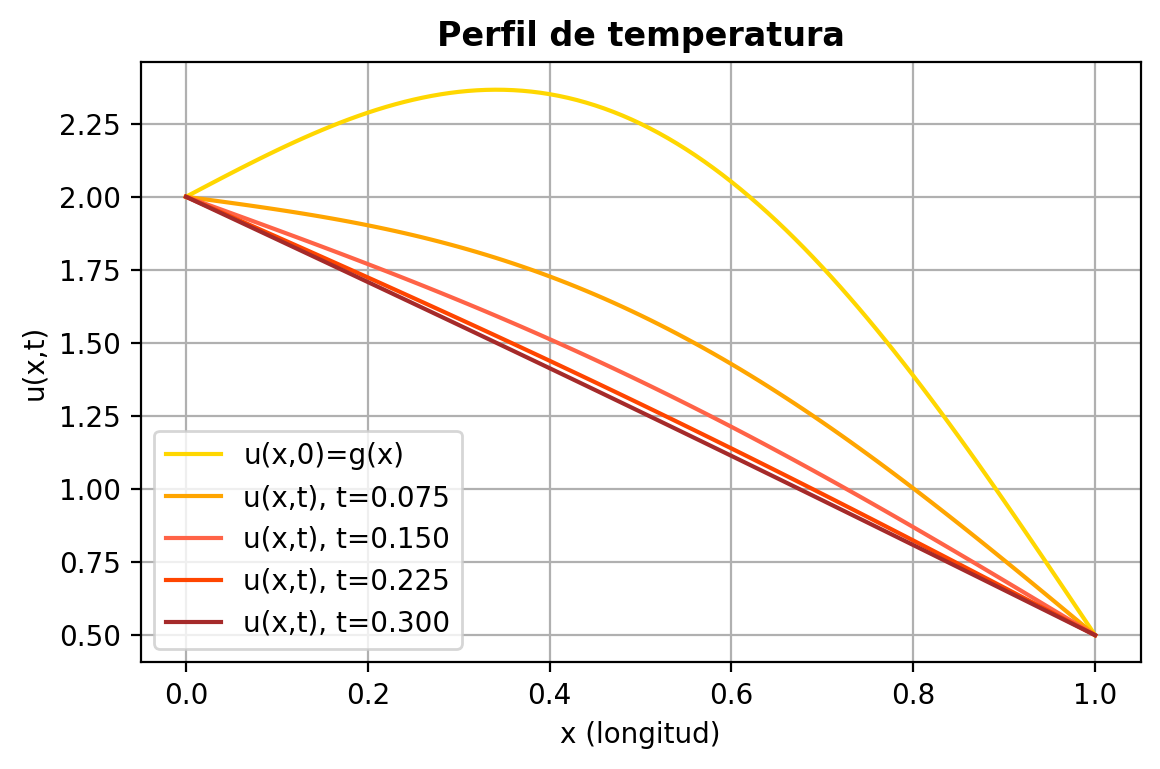

In [ ]:
# Ahora se tomará como tiempo final T=0.3
# Se mantendrá mismo número de pasos Nx y Nt, pero se cambiará el tamaño de incremento en el tiempo para poder llegar a ese tiempo final T

# Nueva magnitud de incremento en el tiempo
dtnuevo = 3e-5

FTCS(K, g, u0t, uLt, Nx, Nt, xmax, dtnuevo)


#### **Método Crank-Nicolson (implícito)**

El valor de D es 4.319999999999999
Tiempo de ejecución: 0.377469539642334 segundos


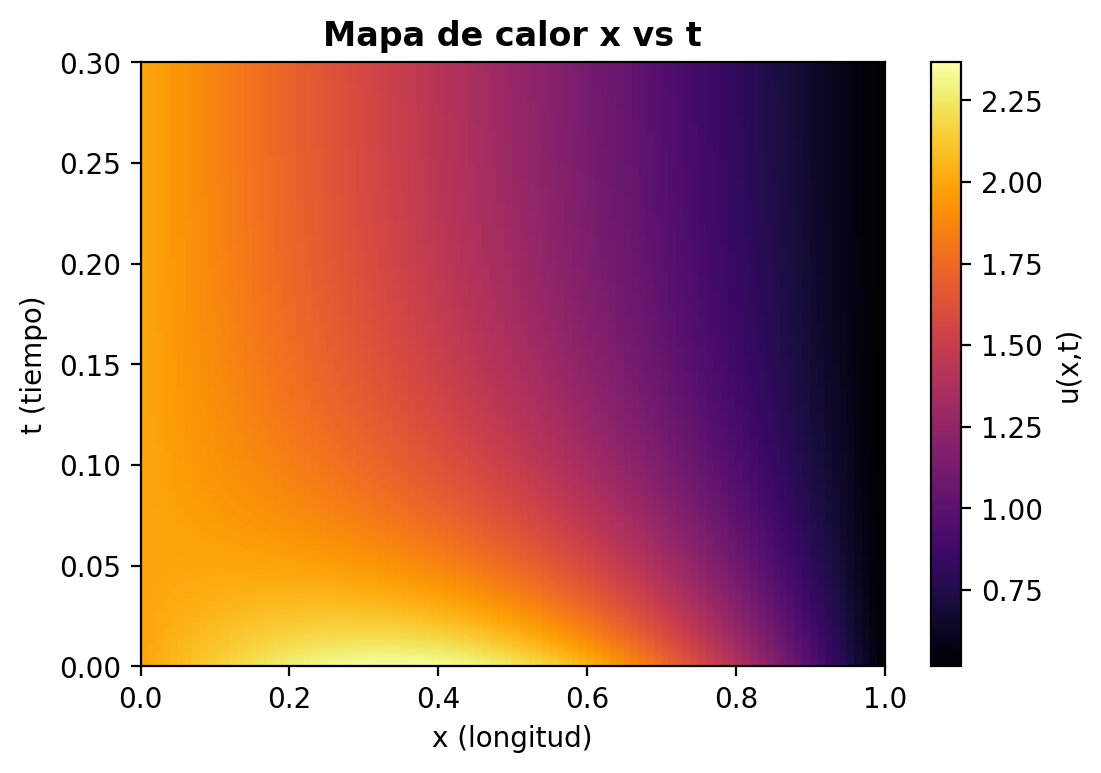

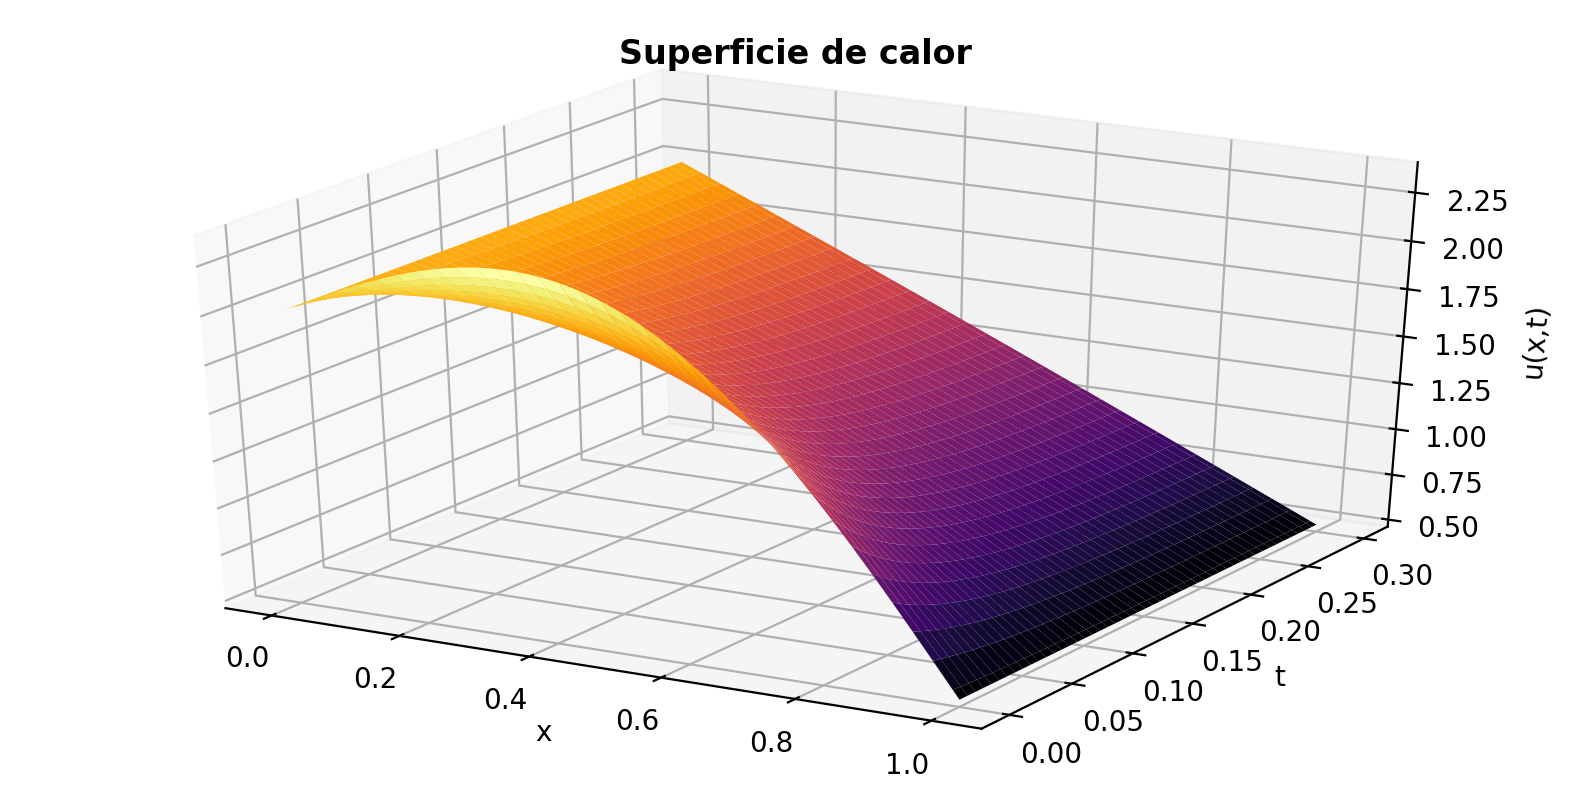

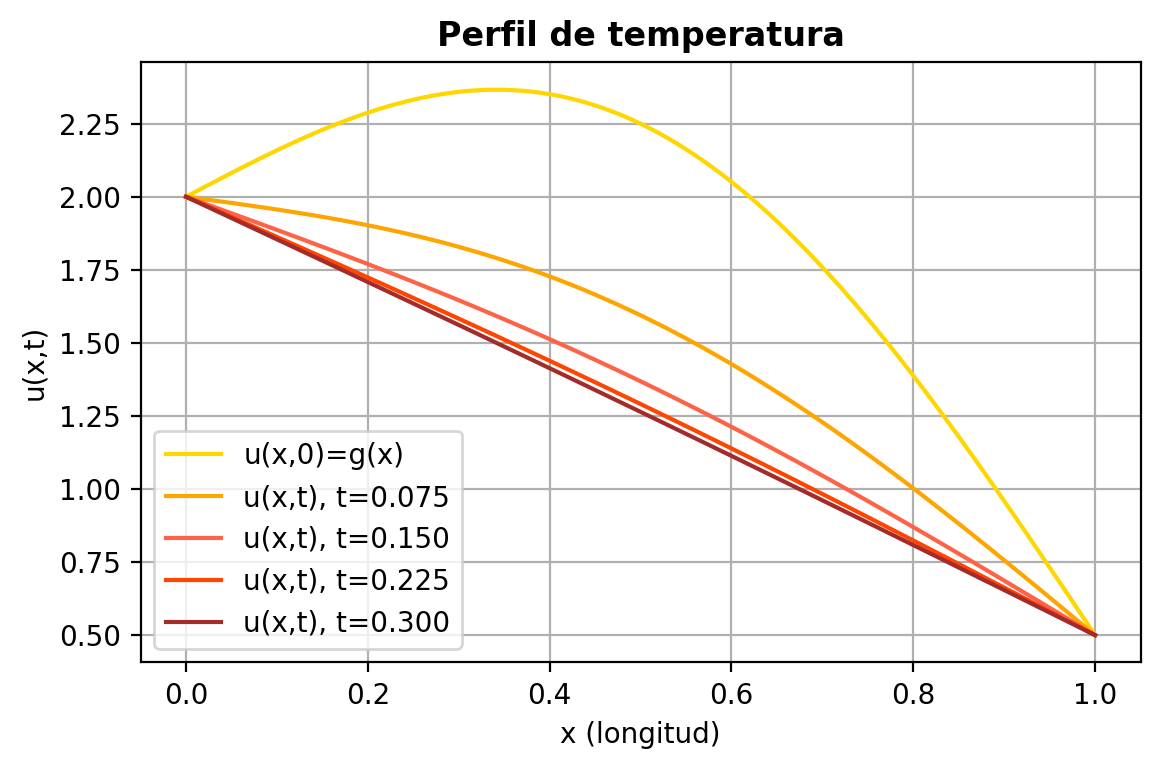

In [ ]:
# Ahora se tomará como tiempo final T=0.3
# Se mantendrá mismo número de pasos Nx y Nt. Al definir el nuevo tiempo final, quedará determinado automaticamente el tamaño de incremento en el tiempo.

# Nuevo valor del tiempo final
tmaxnuevo = 0.3
# Nuevo valor de paso Nt
Ntnuevo = 1000

# Se ejecuta el algoritmo
CrankNicolson(K, g, w0t, wLt, Nx, Ntnuevo, xmax, tmaxnuevo)

### **Comparación 3**

#### **Crank-Nicolson con LU**

El valor de D es 43.199999999999996
Tiempo de ejecución: 46.09100031852722 segundos


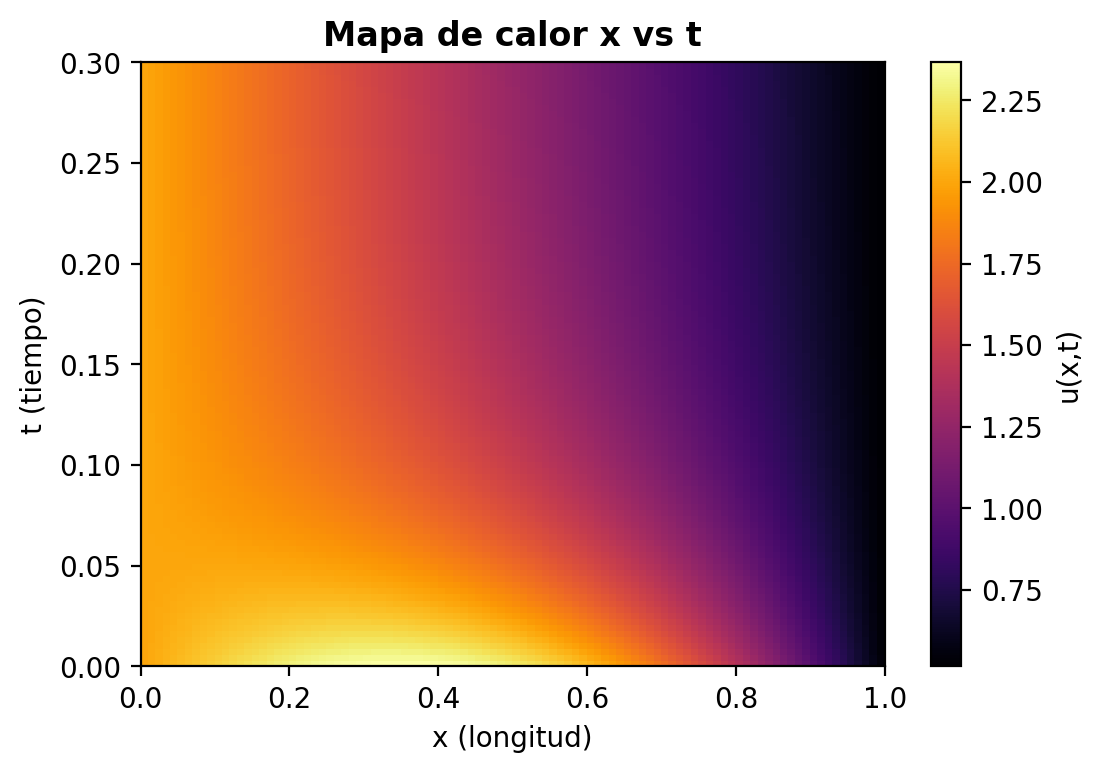

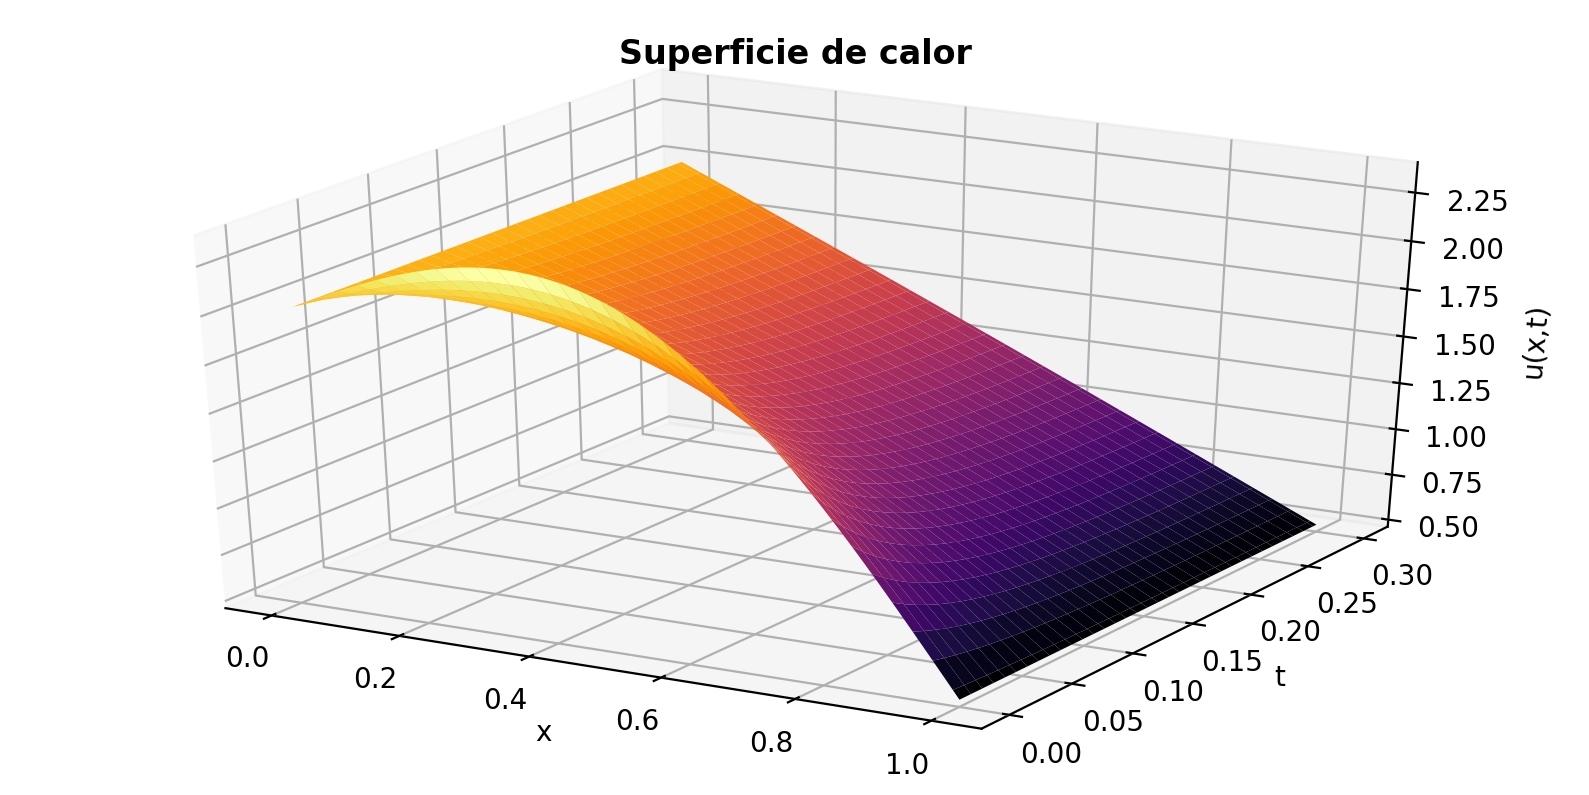

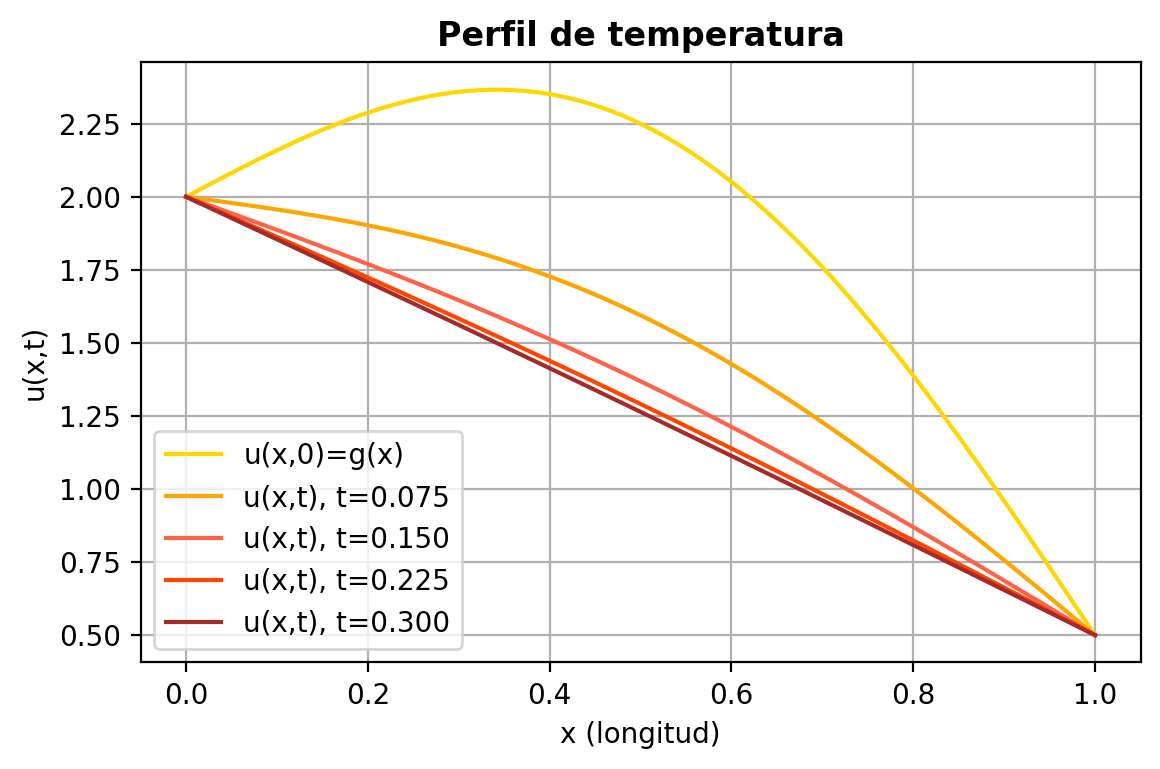

In [ ]:
# Antes se recuperan los algoritmos para realizar una descomposición LU, sutitución hacia adelante y sustitución hacia atrás

# Algoritmo para realizar factorización LU de una matriz A
def factorizacionLU(A):
    # Dimension de la matriz
    n = len(A)
    # Matriz L inicialmente es la identidad
    L = np.identity(n)
    # Inicialmente la matriz A y la matriz U son iguales
    U = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            U[i][j] = A[i][j]
    # Eliminacion gaussiana
    for i in range(0,n):
        for j in range(i+1,n):
            # Guardar los factores de eliminacion gaussiana 
            # en la matriz L
            factor = U[j][i]/U[i][i]
            L[j][i] = factor
            # Realizar eliminacion gaussiana en la matriz U
            # para quedar de forma triangular superior
            for k in range(i,n):
                U[j][k] = U[j][k] - factor*U[i][k]
    return L,U

# Algoritmo para sustitucion hacia delante
# n es el tamano de la dimension del problema
# Matriz L, vector b ya estan dados como parametros
# Guardar los resultados en el vector y
# Ly=b
def sustDelante(L, b):
    n=len(L)
    y=np.empty_like(b)
    y[0] = b[0]
    for i in range(1,n):
        y[i] = b[i]
        for j in range(0,i):
            y[i] -= L[i][j]*y[j]
    return y

# Algoritmo para sustitucion hacia atras
# n es el tamano de la dimension del problema
# Matriz U, vector y ya estan dados como parametros
# Guardar los resultados en el vector x
# Ux=y
def sustAtras(U, y):
    n=len(U)
    x=np.empty_like(y)
    x[n-1] = y[n-1]/U[n-1][n-1]
    for i in range(n-2,-1,-1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] -= U[i][j]*x[j]
        x[i] /= U[i][i]
    return x


# El método solver será para resolver sistemas de ecuaciones lineales
# por medio del método LU, sust hacia adelante y sust hacia atrás
def solverLU(A,b):
    # Llamar funcion de descomposicion LU para obtener/llenar matrices L,U
    L,U=factorizacionLU(A)
    # Llamar funcion sustDelante para obtener/llenar vector y
    y = sustDelante(L,b)    
    # Llamar funcion sustAtras para obtener/llenar vector x 
    # Solucion aproximada/calculada
    x = sustAtras(U,y)
    return x



# CRANK NICOLSON CON LU, SUSTITUCIÓN HACIA ATRÁS Y SUSTITUCIÓN HACIA ADELANTE
# Ahora se usa la función solverLU en el método Crank-Nicolson

def CrankNicolsonLU(K, g, w0t, wLt, Nx, Nt, xmax, tmax):
    start_timeCN = time.time()
    # Magnitud de incremento en el espacio
    difx = xmax/Nx
    # Magnitud de incremento en el tiempo
    dift = tmax/Nt
    # Constante adimensional
    r = K*dift/(difx*difx)
    
    # Se discretiza el espacio
    xp = np.linspace(0.0, xmax, Nx+1)
    # Se discretiza el tiempo
    tp = np.linspace(0.0, tmax, Nt+1)
    
    # Se generan las matrices que almacenarán a las matrices de coeficientes A y B
    # Notar que su dimensión es dos unidades menor que el número de pasos en el espacio
    # pues no están consierando los extremos, porque son valores conocidos por las
    # condiciones de frontera
    A = np.zeros((Nx-1, Nx-1))
    B = np.zeros((Nx-1, Nx-1))
    
    # Se crea el vector que contiene las condiciones de frontera, u(0,t) y u(L,t),en los extremos,
    # las cuales serán iguales para todo tiempo
    b = np.zeros((Nx-1))
    
    # Se registran las correspondientes entradas a cada matriz, A y B,
    # así como al vector b que contiene las condiciones de frontera u(0,t) y u(L,t)
    for i in range(Nx-1):
        if i==0:
            for j in range(Nx-1):
                if j==0:
                    A[i][j] = 2*(1+r)
                    B[i][j] = 2*(1-r)
                elif j==1:
                    A[i][j] = -r
                    B[i][j] = r
            b[i] = 2*r*w0t
        elif i==Nx-2:
            for j in range(Nx-1):
                if j==Nx-2:
                    A[i][j] = 2*(1+r)
                    B[i][j] = 2*(1-r)
                elif j==Nx-3:
                    A[i][j] = -r
                    B[i][j] = r
            b[i] = 2*r*wLt
        else:
            for j in range(Nx-1):
                if j==i-1 or j==i+1:
                    A[i][j] = -r
                    B[i][j] = r
                elif j==i:
                    A[i][j] = 2*(1+r)
                    B[i][j] = 2*(1-r)
    
    # Se crea el arreglo que almacenará, igual que antes, por renglón
    # la aproximación de la solución w para cada tiempo
    w = []
    
    # Se crea un vector que contiene los valores iniciales de la función solución w,
    # los cuales están dados por le perfil de temperautra, concentración al tiempo t=0
    # w(x,0) = g0(x)
    u = np.array(g(xp))
    w.append(u)
    # El arreglo w se convierte en uno tipo arrray para fácil manejo de matrices
    w = np.array(w)
    
    # Al tiempo t=0 todos los términos de la derecha son conocidos, por lo que se
    # procede al cálculo, el cual consisite en multiplicar la matriz B pro el vector
    # u(valores de w a t=0) excepto los extremos y sumar b; los valores de w en los extremos.
    
    c = B.dot(u[1:-1]) + b
    #bb = np.matmul(B,u[1:-1]) + b
    
    # Una vez que se conoce todo el vector la derecha, ahora se tiene un sistema de ecuaciones
    # de la forma A w^(j+1) = bb, el cual se puede resolver sencillamente por algún metodo
    # Esto se hace en un ciclo for, una cantidad Nt de veces, pues en cada paso se va conociendo
    # el vector bb de la derecha que involucra la solución al tiempo j y se resuelve el sistema
    # para encontrar la solución al siguiente tiempo j+1
    for j in range(Nt):
        # Se resuelve el sistema para encontrar la solución al tiempo siguiente j+1
        u[1:-1] = solverLU(A,c)
        # Se agrega en cada paso los valores aproximados de la solución al arreglo w
        w= np.append(w,[u],axis=0)
        # Se calcula el nuevo vector bb que involucra la solución al tiempo anterior
        c = B.dot(u[1:-1]) + b
    
    # El valor de D
    print('El valor de D es', r)
    # Se visualiza el tiempo de ejecución del algoritmo
    print("Tiempo de ejecución: %s segundos" % (time.time() - start_timeCN))
    
    # Se establece la malla para graficar el mapa de calor
    xax, yax = np.meshgrid(xp, tp)
    
    # Se cofiguran las especificaciones del gráfico de mapa de calor, como medida, tipo de gráfico y etiquetas
    figcn1 = plt.figure(figsize=(6,4),dpi=200)
    plt.pcolormesh(xax, yax, w, cmap='inferno', shading='nearest')
    plt.colorbar(label='u(x,t)') #need a colorbar to show the intensity scale
    plt.xlabel('x (longitud)')
    plt.ylabel('t (tiempo)')
    plt.title('Mapa de calor x vs t',fontweight='bold')
    plt.show()
    
    # Se cofiguran las especificaciones del gráfico de superficie, como medida, tipo de gráfico y etiquetas
    figcn2 = plt.figure(figsize=(10,5),dpi=200)
    axcn2 = plt.axes(projection='3d')
    axcn2.plot_surface(xax, yax, w, cmap='inferno', edgecolor='none')
    axcn2.set_xlabel('x')
    axcn2.set_ylabel('t')
    axcn2.set_zlabel('u(x,t)')
    plt.title('Superficie de calor',fontweight='bold')
    
    # Se cofiguran las especificaciones del gráfico de x vs u
    figcn3 = plt.figure(figsize=(5,3),dpi=200)
    # Se establece espacio (con parámetros predeterminados) donde estarán los distintos gráficos
    axcn3 = figcn3.add_axes([0,0,1,1])
    # Especificaciones de datos y etiquetas
    # Se toman algunos índices para ver la evolución de la solución en el tiempo
    # Separador de índices
    sep = int(Nt/4)
    ind0, ind1, ind2, ind3, ind4 = 0, sep, 2*sep, 3*sep, 4*sep
    # Se calcula el tiempo correspondiente a esos índices
    t0, t1, t2, t3, t4 = ind0*dift, ind1*dift, ind2*dift, ind3*dift, ind4*dift
    # Se generan los gráficos
    axcn3.plot(xp, w[ind0,:], label='u(x,0)=g(x)', color='gold')
    axcn3.plot(xp, w[ind1,:], label='u(x,t), t={0:.3f}'.format(t1), color='orange')
    axcn3.plot(xp, w[ind2,:], label='u(x,t), t={0:.3f}'.format(t2), color='tomato')
    axcn3.plot(xp, w[ind3,:], label='u(x,t), t={0:.3f}'.format(t3), color='orangered')
    axcn3.plot(xp, w[ind4,:], label='u(x,t), t={0:.3f}'.format(t4), color='brown')
    
    plt.xlabel('x (longitud)')
    plt.ylabel('u(x,t)')
    plt.title('Perfil de temperatura',fontweight='bold')
    plt.grid()
    axcn3.legend()
    plt.show

# Se ejecuta el algoritmo

# Se considera un número de pasos Nt más pequeño que los anteriores, sólo para motivos de comparación
NtLU = 100 

CrankNicolsonLU(K, g, w0t, wLt, Nx, NtLU, xmax, tmaxnuevo)

#### **Crank-Nicolson versión inicial (con np.linalg.solve())** 

El valor de D es 43.199999999999996
Tiempo de ejecución: 0.06427359580993652 segundos


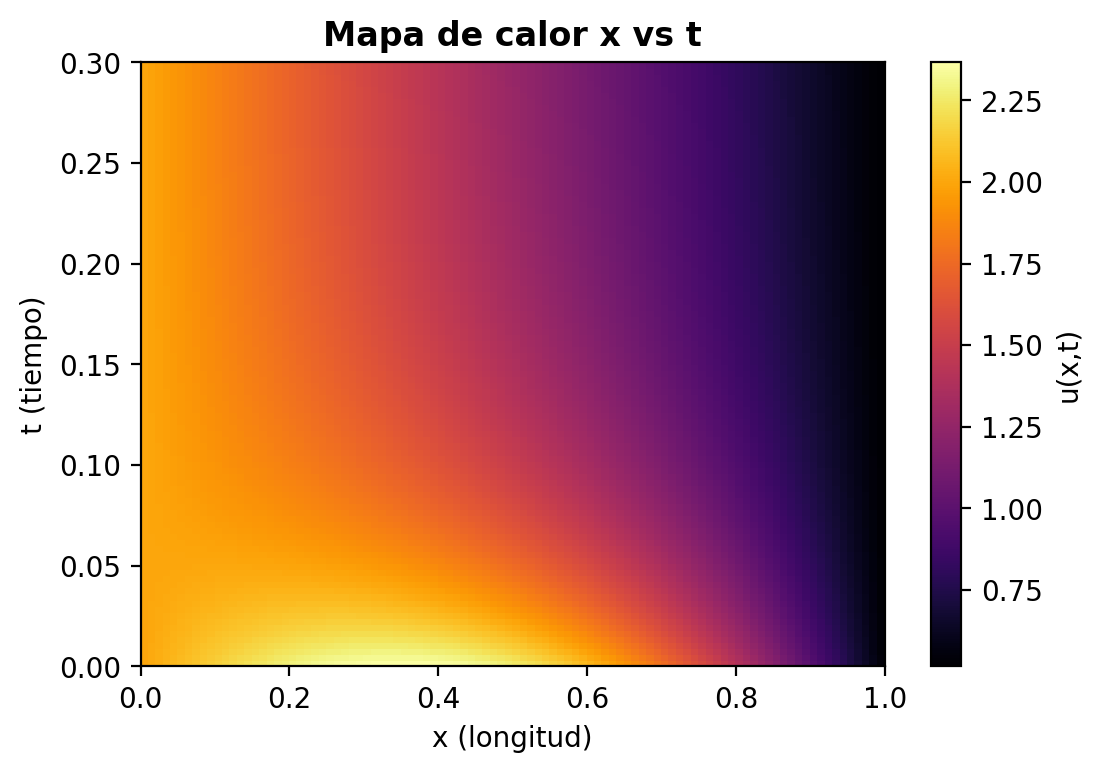

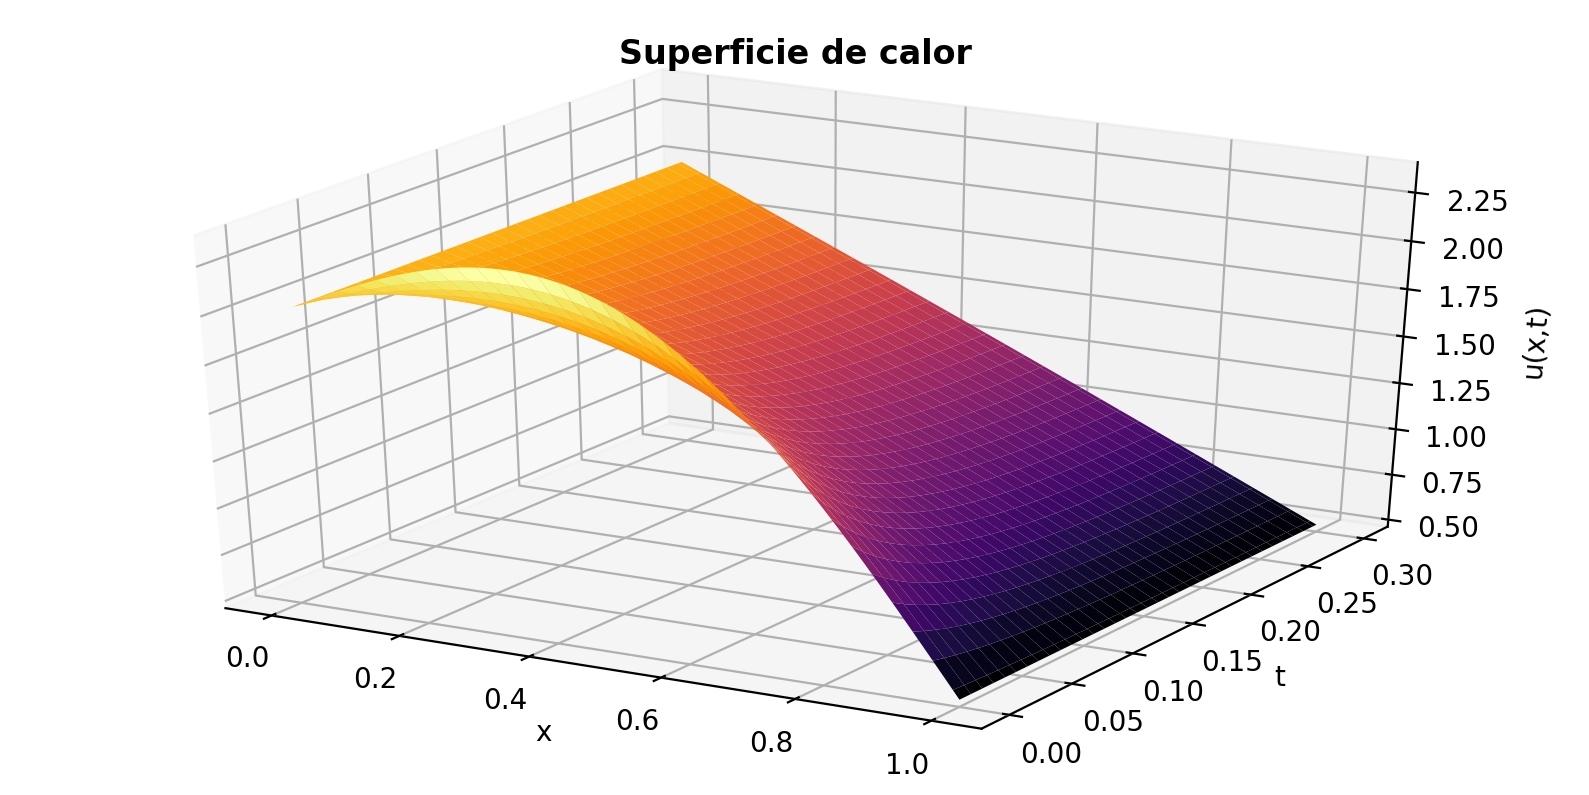

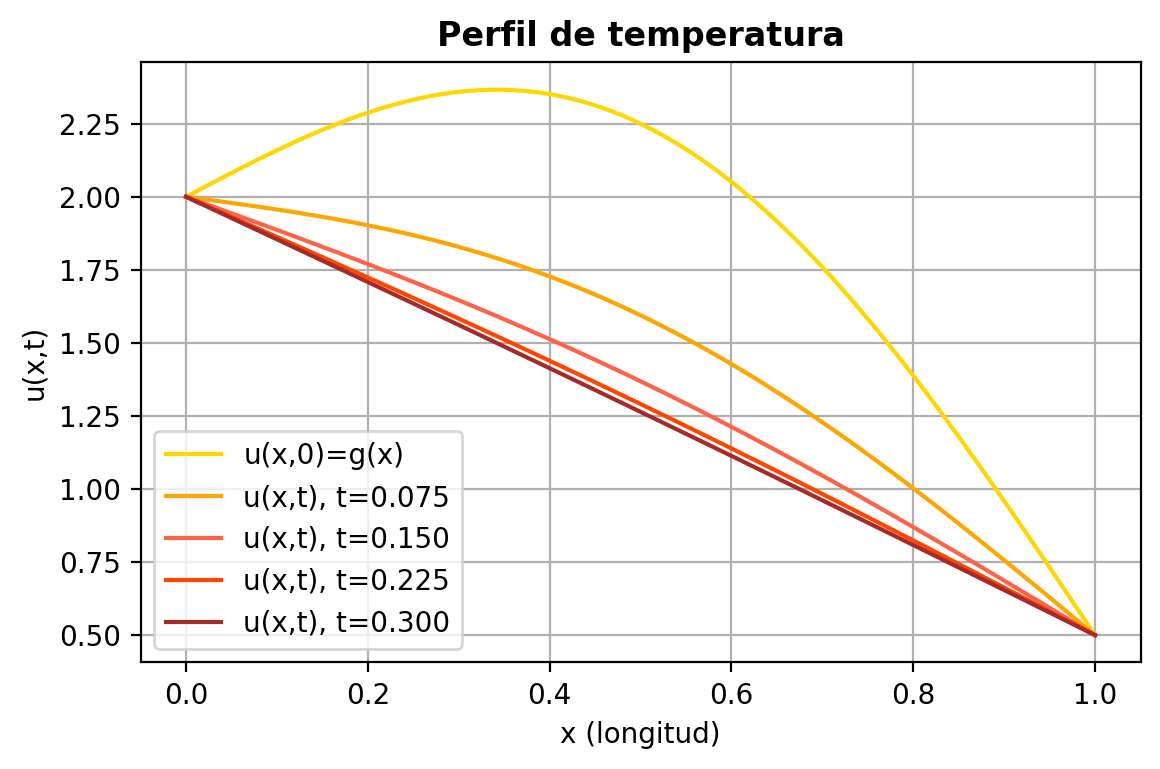

In [ ]:
# Se considera el mismo número de pasos usado para el método Crank-Nicolson con LU, pero esta vez se ejecuta el método Crank-Nicolson versión inicial, es decir, con la función np.linalg.solve()

CrankNicolson(K, g, w0t, wLt, Nx, NtLU, xmax, tmaxnuevo)

## **Conclusiones**
<DIV align="justify">

Ambos métodos resultaron bastante efectivos dentro de sus propias limitaciones y caraterísticas. De modo que no es posible declarar un método absolutamente eficiente, pues depende del tipo de porblema uno será más práctico y efectivo que otro. A continuación se presenta una tabla para resumir las principales ventajas y/o desventajas de cada uno.

<h4><center>Método FTCS (explícito)</center></h4>

Ventajas  | Desventajas
-------------------|------------------
$\bullet$ Fácil implementación en código.      | $\bullet$ Condicionalmente estable.
$\bullet$ Mayor rapidez de cálculo con los mismos | $\bullet$ En general requiere incrementos de 
parámetros de número de pasos $N_{x}$, $N_{t}$, | tiempo $\Delta t$, muy pequeños para converger
y tamaños de incremento $\Delta x$ y $\Delta t$.       |   y conservar y ser rápido.



<h4><center>Método Crank-Nicolson (implícito)</center></h4>

Ventajas  | Desventajas
-------------------|------------------
$\bullet$ Incondicionalmente estable       | $\bullet$ Más difícil de implementar en código
$\bullet$ Muy eficiente para simular hasta cualquier | $\bullet$ Mayor tiempo de ejecución cuando
tiempo final $T$ sin importar los tamaños |  el número de pasos $N_{t}$ es muy grande.
de incremento $\Delta x$ y $\Delta t$ siempre que $N_{t}$ |  
 no sea muy grande. |

Cabe mencionar, como se esperaba, que el método implícito representó un desafío para ser programado y efectivamente resulta ser muy costoso computacionalmente (mayor tiempo de ejecucuión y manipulación de matrices) para resolver el problema. Sin embargo, el hecho de ser incodicionalmente estable, lo vuelve un método muy flexible para simulaciones con tiempos finales distintos sin limitaciones de tamaños de incremento en el espacio y tiempo.

No obstante, el método explícito ofrece una aproximación bastante buena en un tiempo de ejecución corto y es más intuitivo en principio, visualizar el proceso y los cálculos para obtener la solución. De modo que se puede considerar una gran opción para geenrar resultados inmediatos cuando se tienen incrementos de tiempo muy pequeños.

Así, ambos métodos son una excelente herramienta según las necesidades del problema. Y este proyecto, permitió analizar y observar de cerca cómo se pleantea un método de aproximación de una ecuación diferencial parcial que puede resultar complicado en unos casos obtener una solución analítica. La forma de discreticar las dimensiones de espacio y tiempo para tener una expresión que permita calcular de forma directa (método explícito) o sistemas de ecuaciones que pueden ser tratados mediante herramientas de álgebra lineal (método implícito) para conseguir la solución del problema.

 </DIV>

## **Fuentes de información**

1. Burden, R. y Douglas, F. (2011). *Numerical Analysis*. (9a ed.) Massachusetts, EUA: Cengage Learning.

2. Causon, M. y Mingham, G. (2010). *Introductory Finite Fifference Fethods for PDEs*. Reino Unido: Ventus Publishing Aps.

2. Cheney, W. y Kincaid, D. (2011). *Numerical Mathematics and Computing*. (11a ed). Massachusetts, EUA: Cengage Learning.


